# Possible to-do's:

1. Aligned sequence analysis:
    - Fetch full protein sequences `X`
    - Align `X`
    - Check the numbering of SNPs `X`
    - Assign SNPs to the meta-sequence `X` (at least most of them)
    - Assign the structural segments to the meta-sequence
    - Profit...

# GonmAD analysis
## Library import

In [137]:
from pathlib import Path
import os
import pandas

In [138]:
from matplotlib import pyplot
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")
matplotlib.rcParams["figure.figsize"] = (10, 10)

In [139]:
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.SeqUtils import seq1

## Importing the files
The raw files come in two sets. One is from GnomAD v3 and the other from GonAD v2. The second is present as a backup if the mapping to the protein sequence vrom v3 fails.

In [140]:
_folder_path = Path() / "Raw_data"
_raw_files = [x for x in os.listdir(_folder_path) if os.path.isfile(_folder_path / x)]
_alternative_raw = [file for file in _raw_files if "2.1.1" in file]
_raw_files = list(set(_raw_files) - set(_alternative_raw))
print(_raw_files)

['gnomAD_v3.1.1_ENSG00000120903_2021_08_26_22_10_13_CHRNA2.csv', 'gnomAD_v3.1.1_ENSG00000183185_2021_08_25_17_54_54_GABRR3.csv', 'gnomAD_v3.1.1_ENSG00000109738_2021_08_26_22_08_17_GLRB.csv', 'gnomAD_v3.1.1_ENSG00000151834_2021_08_25_17_49_15_GABRA2.csv', 'gnomAD_v3.1.1_ENSG00000182256_2021_08_25_17_52_30_GABRG3.csv', 'gnomAD_v3.1.1_ENSG00000187730_2021_08_25_17_55_11_GABRD.csv', 'gnomAD_v3.1.1_ENSG00000145863_2021_08_25_17_50_27_GABRA6.csv', 'gnomAD_v3.1.1_ENSG00000094755_2021_08_25_17_53_59_GABRP.csv', 'gnomAD_v3.1.1_ENSG00000146276_2021_08_25_17_54_23_GABRR1.csv', 'gnomAD_v3.1.2_ENSG00000117971_2021_10_26_19_03_47_CHRNB4.csv', 'gnomAD_v3.1.1_ENSG00000102287_2021_08_25_17_51_00_GABRE.csv', 'gnomAD_v3.1.2_ENSG00000135902_2021_10_26_19_04_55_CHRND.csv', 'gnomAD_v3.1.1_ENSG00000011677_2021_08_25_17_49_37_GABRA3.csv', 'gnomAD_v3.1.1_ENSG00000163285_2021_08_25_17_51_58_GABRG1.csv', 'gnomAD_v3.1.2_ENSG00000174343_2021_10_26_19_00_26_CHRNA9.csv', 'gnomAD_v3.1.1_ENSG00000147434_2021_09_06_15_

We import the file as pandas DataFrame and add a column in which we track the gene of interest.

In [141]:
data = []
for file in _raw_files:
    data.append(pandas.read_csv(_folder_path / file))
    data[-1]["Gene"] = file.split(".")[-2].split("_")[-1]
data_alternative = []
for file in _alternative_raw:
    data_alternative.append(pandas.read_csv(_folder_path / file))
    data_alternative[-1]["Gene"] = file.split(".")[-2].split("_")[-1]

In [142]:
data[0]

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,...,Hemizygote Count Ashkenazi Jewish,Allele Count African/African-American,Allele Number African/African-American,Homozygote Count African/African-American,Hemizygote Count African/African-American,Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Gene
0,8,27461559,rs1225461365,C,A,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.*70G>T,...,0,0,41468,0,0,1,68042,0,0,CHRNA2
1,8,27461574,rs780560860,C,T,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.*55G>A,...,0,0,41440,0,0,1,68034,0,0,CHRNA2
2,8,27461575,rs75394008,G,A,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.*54C>T,...,0,80,41456,0,0,8,68036,0,0,CHRNA2
3,8,27461583,rs978024767,G,A,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.*46C>T,...,0,0,41472,0,0,0,68050,0,0,CHRNA2
4,8,27461592,rs141508075,C,G,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.*37G>C,...,0,6,41446,0,0,0,68038,0,0,CHRNA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,8,27471120,rs987563818,T,C,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.-62A>G,...,0,0,41446,0,0,0,68032,0,0,CHRNA2
641,8,27471122,rs549463792,TC,T,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.-65del,...,0,165,41428,0,0,0,68008,0,0,CHRNA2
642,8,27471123,rs553788971,C,T,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.-65G>A,...,0,0,41108,0,0,1,68036,0,0,CHRNA2
643,8,27471123,rs553788971,C,A,gnomAD Genomes,NaN,PASS,ENST00000407991.3,c.-65G>T,...,0,1,41108,0,0,0,68036,0,0,CHRNA2


Some columns are present only in a subset of files. We will keep them when joining the datasets, and introduce NaN where we have no data.

In [143]:
print(*[len(x.columns) for x in data], sep="\n")

62
61
62
61
61
61
61
61
61
62
61
62
61
61
62
62
62
62
62
62
61
61
62
61
61
61
62
62
61
61
62
62
61
62
62
62
62
62
61
61
61
62
61
62
62
61
61


## Joining the datasets

In [144]:
dataset = pandas.concat(data, axis=0, join="outer", ignore_index=True)
dataset_alternative = pandas.concat(data_alternative, axis=0, join="outer", ignore_index=True)

In [145]:
dataset.shape

(28738, 62)

## Exploring the total dataset
### Different polymorphism annotations
For a complete description of the effect annotations see [the ensembl description](https://www.ensembl.org/info/genome/variation/prediction/predicted_data.html).

In [146]:
dataset["VEP Annotation"].unique()

array(['3_prime_UTR_variant', 'missense_variant', 'synonymous_variant',
       'frameshift_variant', 'stop_gained', 'splice_acceptor_variant',
       'splice_region_variant', 'intron_variant', 'inframe_deletion',
       'splice_donor_variant', 'start_lost', '5_prime_UTR_variant',
       'stop_lost', 'inframe_insertion', 'stop_retained_variant', nan,
       'protein_altering_variant'], dtype=object)

In [147]:
_VEPs = ["missense_variant",
         "stop_gained",
         "splice_acceptor_variant",
         "splice_donor_variant",
         "frameshift_variant",
         "inframe_deletion",
         "inframe_insertion",
         "start_lost",
         "stop_lost",
         "protein_altering_variant"]
print(*[sum(dataset["VEP Annotation"] == x) for x in _VEPs], sep="\n")

8518
299
93
126
451
141
41
36
11
2


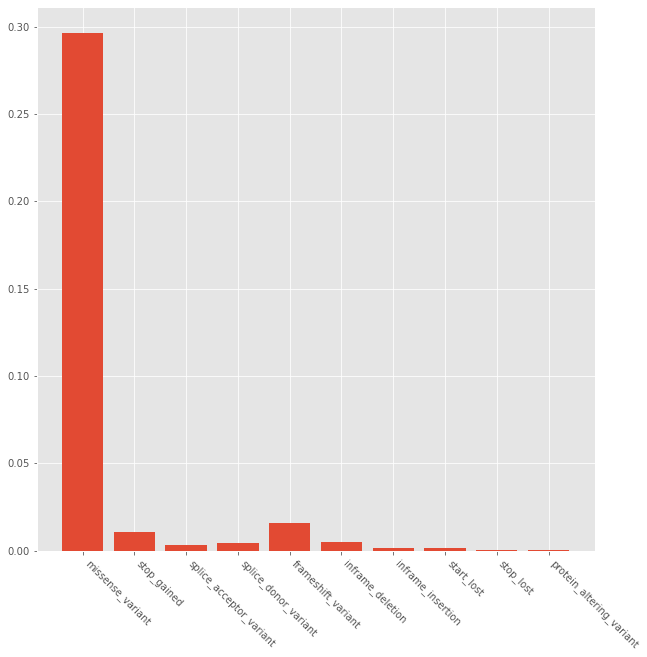

In [148]:
pyplot.bar(_VEPs, [sum(dataset["VEP Annotation"] == x)/dataset.shape[0]  for x in _VEPs])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.show()

## Filtering

We filter only for the GnomAD data.

In [149]:
dataset = dataset[dataset["Source"] == "gnomAD Genomes"]
dataset.reset_index(inplace=True)

For now we filter by including only variants present in at least 0.01 % of the population.

We also retain just the columns of interest. Let's see the distribution of the annotations now.

In [150]:
subdata = dataset[dataset["Allele Count"]/dataset["Allele Number"] > 0.0001]
subdata = subdata[subdata["VEP Annotation"].isin(_VEPs)]
subdata

,index,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,...,Hemizygote Count Ashkenazi Jewish,Allele Count African/African-American,Allele Number African/African-American,Homozygote Count African/African-American,Hemizygote Count African/African-American,Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Gene
101,101,8,27463009.0,rs56344740,G,T,gnomAD Genomes,NaN,PASS,ENST00000407991.3,...,0.0,39.0,41462.0,0.0,0.0,387.0,68036.0,1.0,0.0,CHRNA2
150,150,8,27463209.0,rs141721605,C,T,gnomAD Genomes,NaN,PASS,ENST00000407991.3,...,0.0,8.0,41456.0,0.0,0.0,34.0,68048.0,0.0,0.0,CHRNA2
183,183,8,27463343.0,rs149464248,C,T,gnomAD Genomes,NaN,PASS,ENST00000407991.3,...,0.0,0.0,41432.0,0.0,0.0,7.0,68004.0,0.0,0.0,CHRNA2
270,270,8,27463698.0,rs77710085,C,T,gnomAD Genomes,NaN,PASS,ENST00000407991.3,...,0.0,9.0,31358.0,0.0,0.0,2.0,54494.0,0.0,0.0,CHRNA2
272,272,8,27463712.0,rs146751925,T,C,gnomAD Genomes,NaN,PASS,ENST00000407991.3,...,0.0,67.0,39074.0,0.0,0.0,0.0,65718.0,0.0,0.0,CHRNA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28627,28635,3,184106293.0,rs141615038,C,T,gnomAD Genomes,NaN,PASS,NaN,...,0.0,0.0,41414.0,0.0,0.0,2.0,68020.0,0.0,0.0,5HT3E
28687,28695,3,184106595.0,rs149134892,T,G,gnomAD Genomes,NaN,PASS,NaN,...,0.0,799.0,41442.0,13.0,0.0,9.0,68014.0,0.0,0.0,5HT3E
28690,28698,3,184106610.0,rs13324468,G,A,gnomAD Genomes,NaN,PASS,NaN,...,0.0,5008.0,41402.0,276.0,0.0,22.0,68018.0,0.0,0.0,5HT3E
28697,28705,3,184106619.0,rs146232407,G,A,gnomAD Genomes,NaN,PASS,NaN,...,0.0,44.0,41444.0,0.0,0.0,6.0,68020.0,0.0,0.0,5HT3E


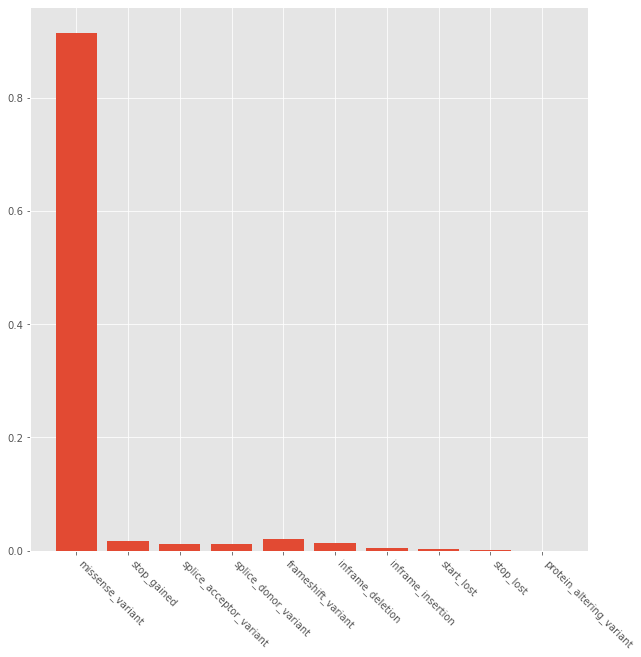

In [151]:
pyplot.bar(_VEPs, [sum(subdata["VEP Annotation"] == x)/subdata.shape[0]  for x in _VEPs])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.show()

## Distribution across the genes
First we just look at the number of different polymorphisms detected.

In [152]:
matplotlib.rcParams["figure.figsize"] = (30, 10)

In [153]:
_genes = subdata["Gene"].unique()
_values = pandas.DataFrame({"Gene": _genes, "Value": [sum(subdata["Gene"] == x)/subdata.shape[0]  for x in _genes]})
_values.sort_values(by="Value", ascending=False, inplace=True, ignore_index=True)

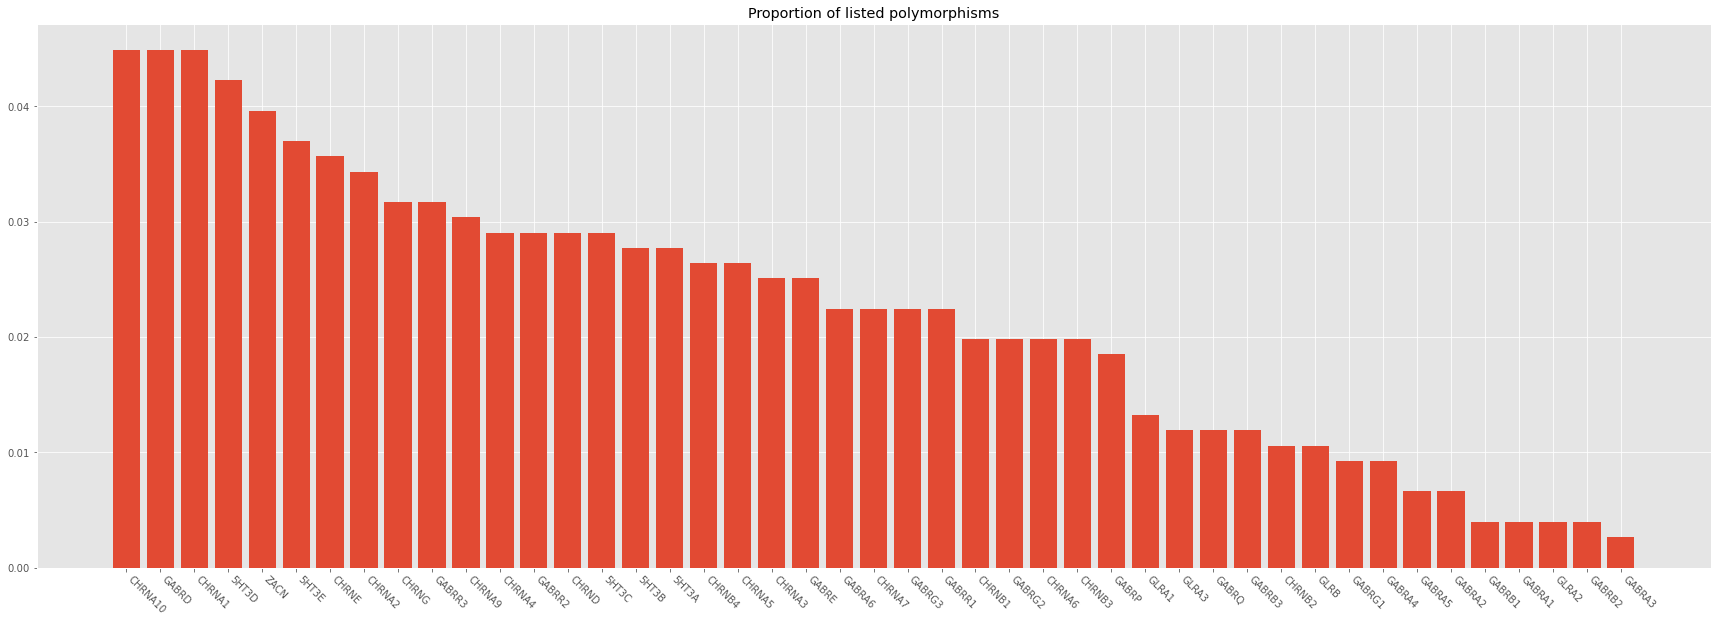

In [154]:
pyplot.bar(_values["Gene"], _values["Value"])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.title("Proportion of listed polymorphisms")
pyplot.show()

Now we check the total number of detected alleles. Note that the sample sizes do not match. Acutally, let us first look at how much that deviates.

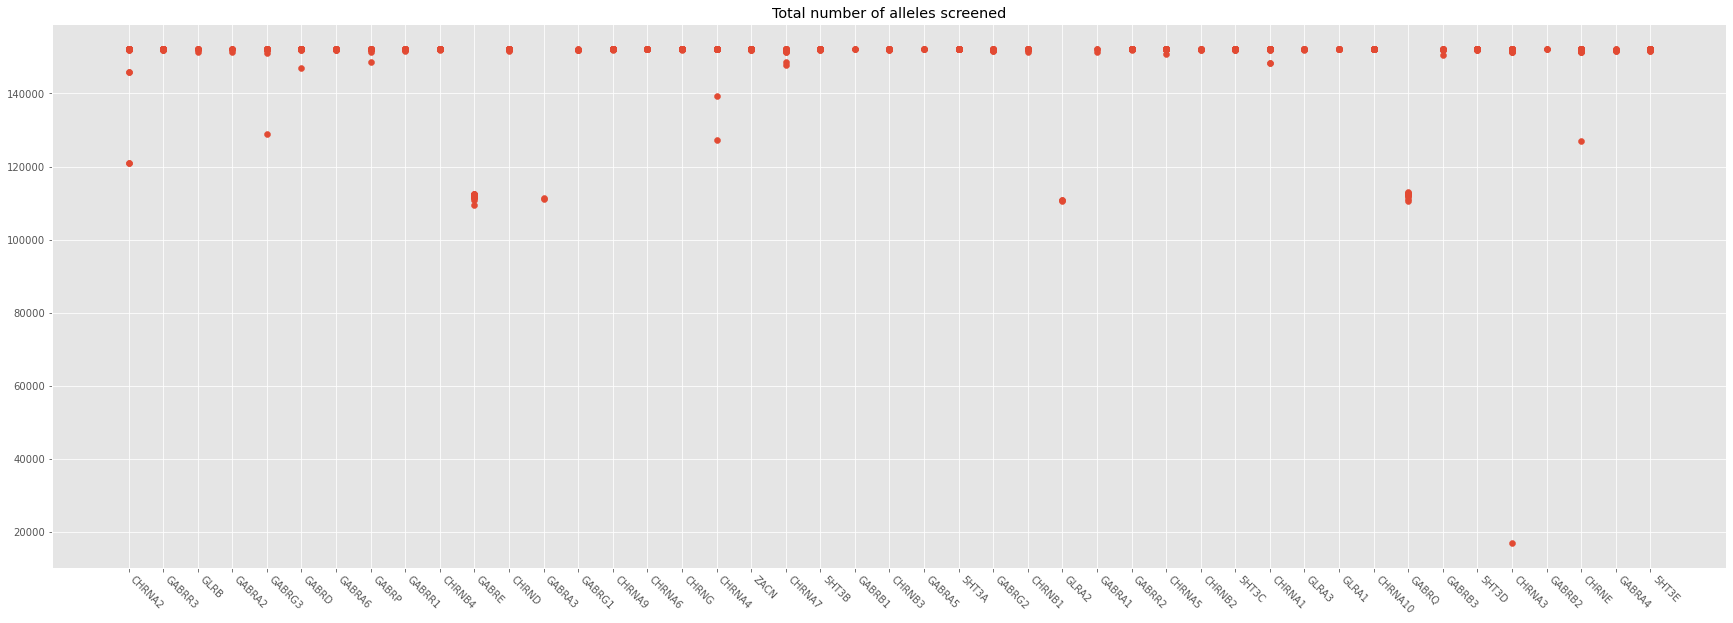

In [155]:
pyplot.scatter(subdata["Gene"], subdata["Allele Number"])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.title("Total number of alleles screened")
pyplot.show()

We might want to discard CHRNA3 samples with total allele number lower than 20,000, as this will become the possible outlier in later statistics.

Next we sum up the allele counts across all the mutations for single genes. 

In [156]:
_values["Allele Count"] = [sum(subdata["Allele Count"][subdata["Gene"] == x]) for x in _values["Gene"]]
_values.sort_values(by="Allele Count", ascending=False, inplace=True, ignore_index=True)

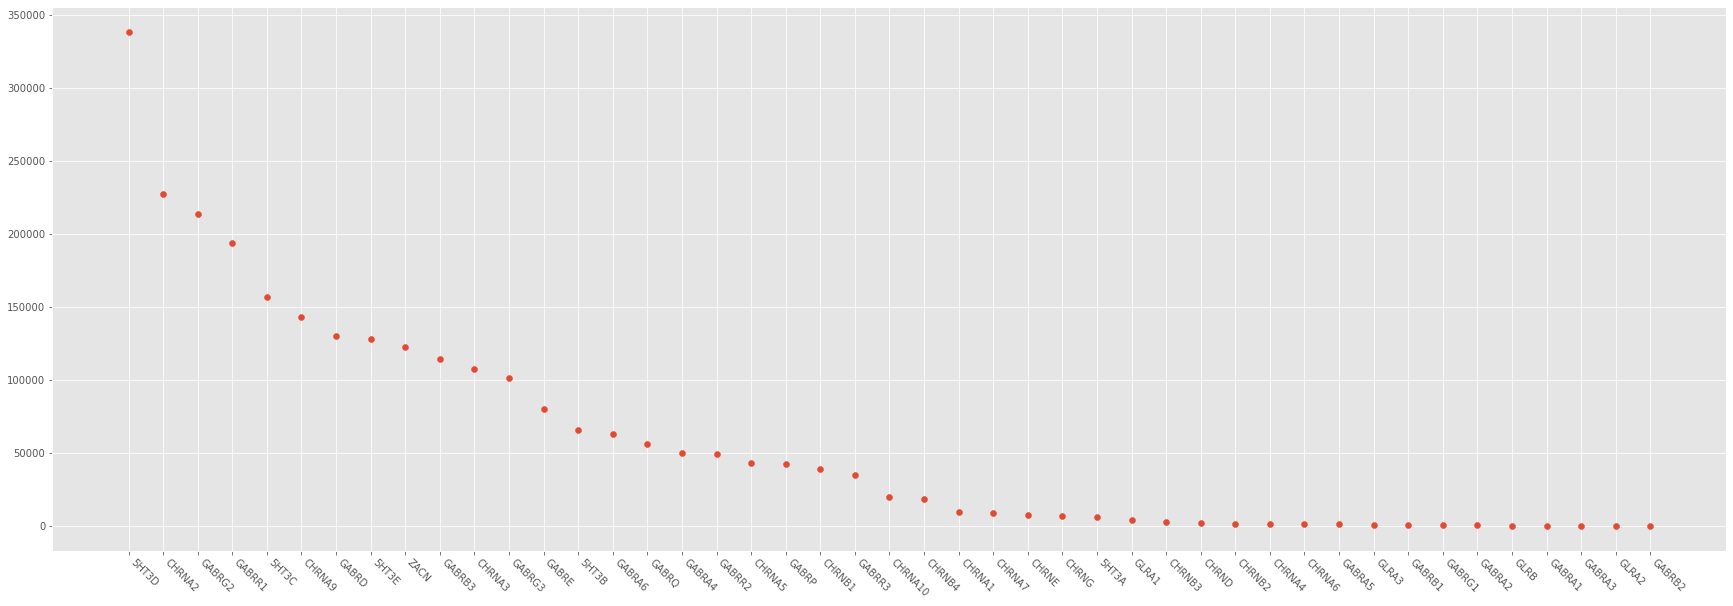

In [157]:
pyplot.scatter(_values["Gene"], _values["Allele Count"])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.show()

## Extracting the AA number from missense variants
We extracted the numbering of amino acid from `Protein Sequence` column. Then we used UniProt for determining the lengths of all proteins and normalized the position of amino acids to the full protein lengths. For a more in-depth analysis we would need an alignment.

In [158]:
missense = subdata[subdata["VEP Annotation"] == "missense_variant"]
missense["AA Number"] = missense["Protein Consequence"].str.extract(r"[a-zA-Z]([0-9]+)[a-zA-Z]").astype("int32")
missense.reset_index(inplace=True)

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [159]:
missense["AA Relative"] = 0
# Lengths are taken from UniProt
lengths = {
    "GABRA3": 492,
    "GABRA1": 456,
    "CHRNA3": 505,
    "GABRP": 440,
    "CHRNA4": 627,
    "GLRA2": 452,
    "GABRE": 506,
    "GABRA4": 554, 
    "GLRB": 497,
    "GABRR2": 465,
    "GABRG2": 467,
    "CHRNA2": 529,
    "CHRNA1": 482,
    "GLRA3": 464,
    "GABRA6": 453,
    "GABRB2": 512,
    "GLRA1": 457,
    "GABRR1": 479,
    "CHRNA6": 494,
    "5HT3B": 441,
    "GABRA2": 451,
    "GABRG1": 465,
    "GABRB1": 474,
    "GABRB3": 473,
    "5HT3A": 478,
    "CHRNA5": 468,
    "5HT3C": 447,
    "GABRG3": 467,
    "GABRR3": 467,
    "5HT3E": 456,
    "5HT3D": 454,
    "GABRA5": 462,
    "ZACN": 412,
    "GABRD": 452,
    "GABRQ": 632,
    "CHRNE": 493,
    "CHRNB4": 498,
    "CHRNA10": 450,
    "CHRND": 517,
    "CHRNB3": 458,
    "CHRNB2": 502,
    "CHRNB1": 501,
    "CHRNA9": 479,
    "CHRNA7": 502,
    "CHRNG": 517,
}
for gene in missense["Gene"].unique():
    missense["AA Relative"][missense["Gene"] == gene] = missense["AA Number"][missense["Gene"] == gene] / lengths[gene]

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

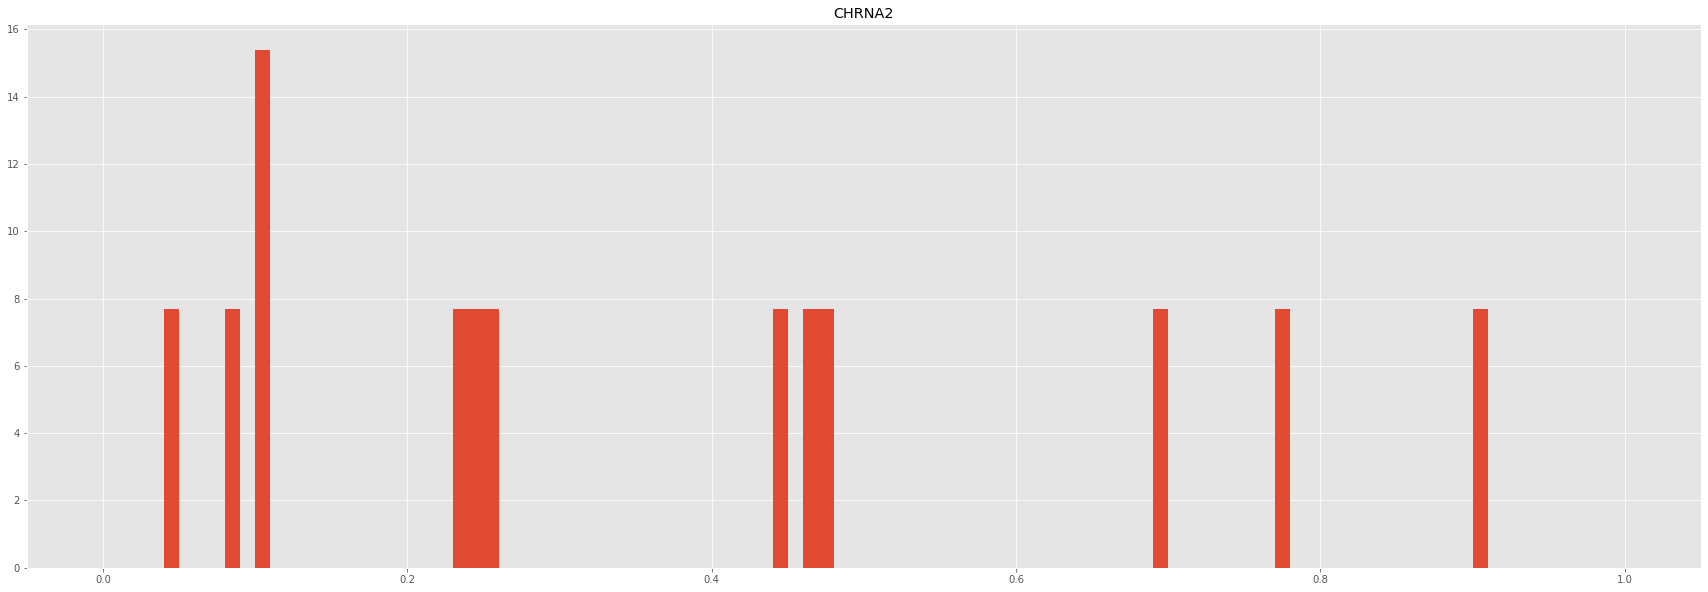

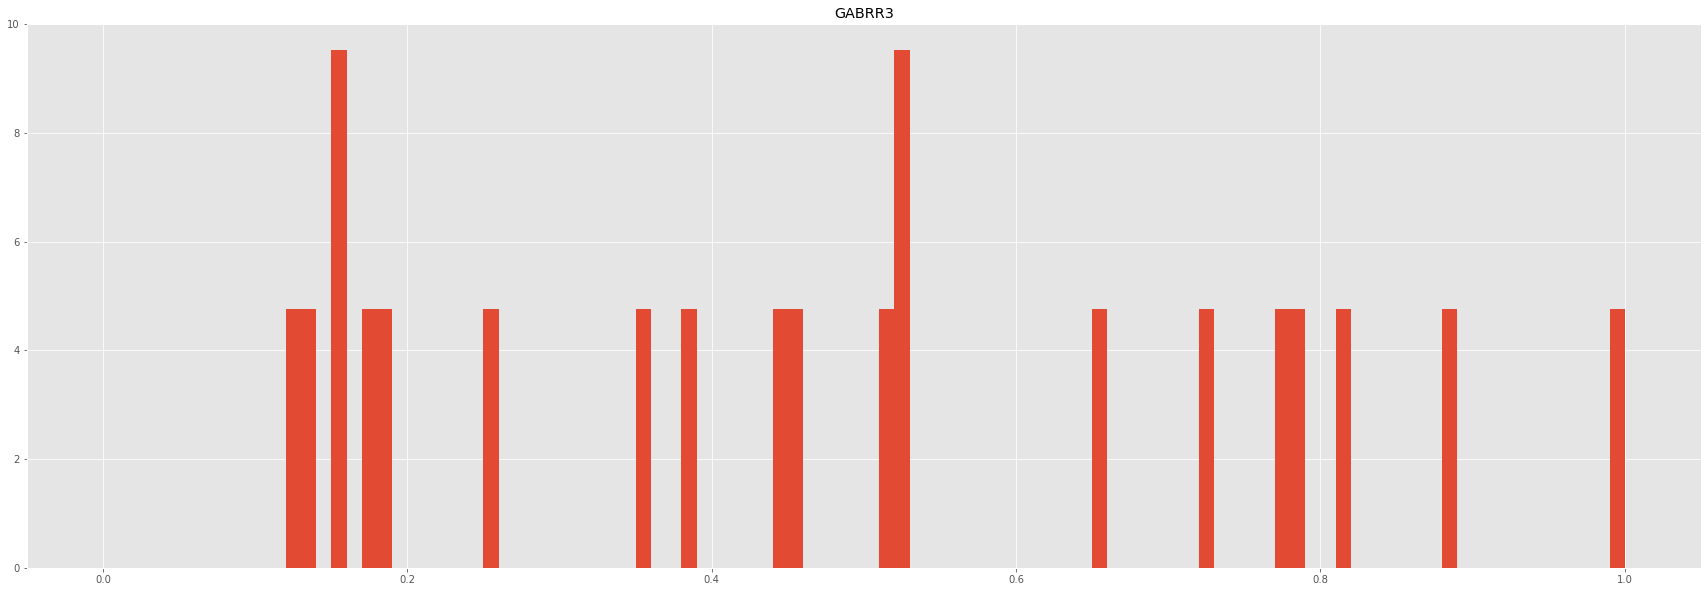

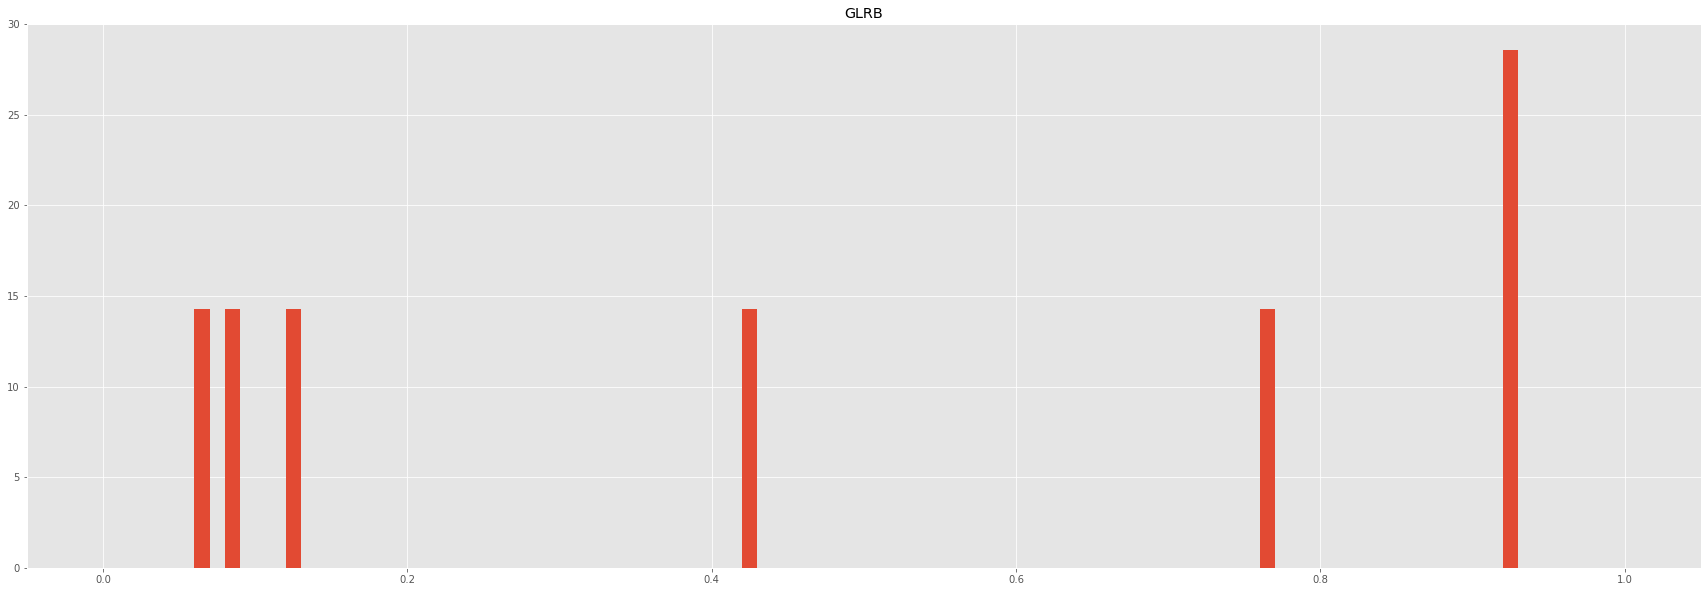

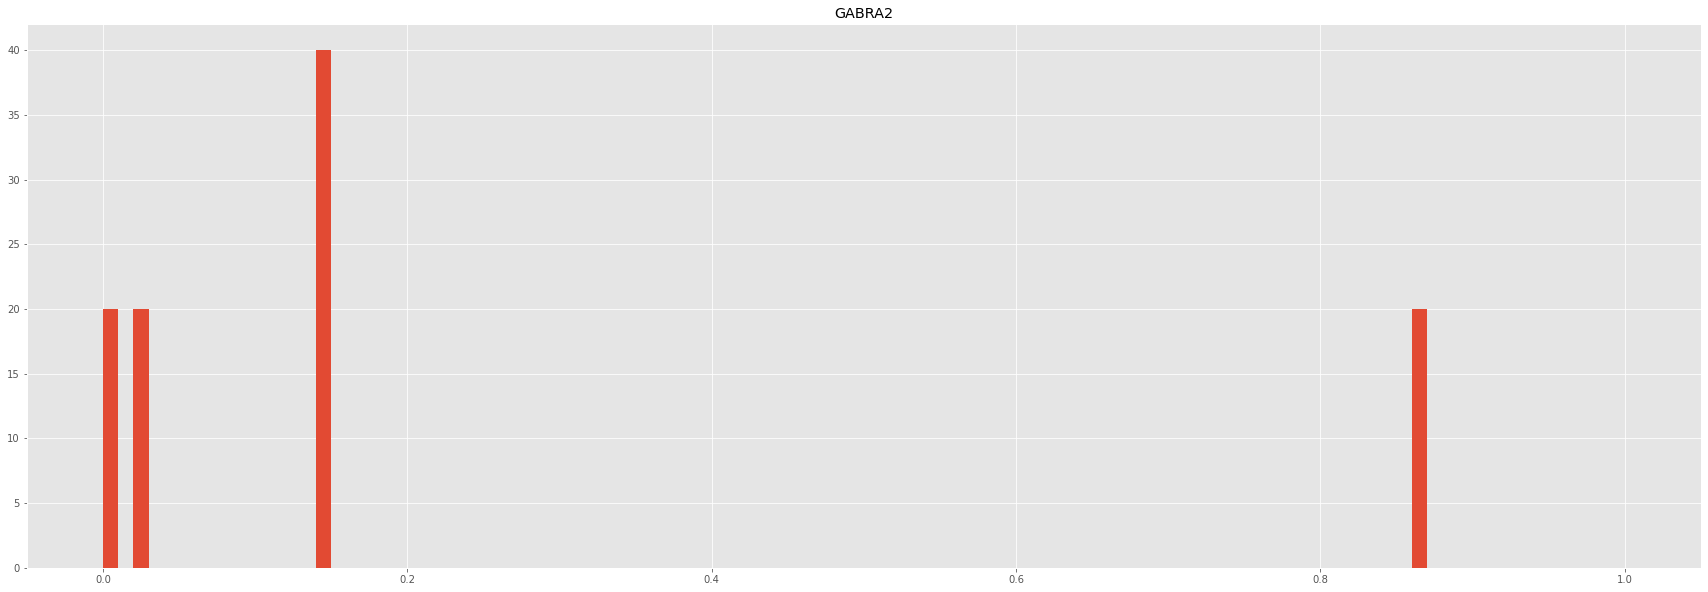

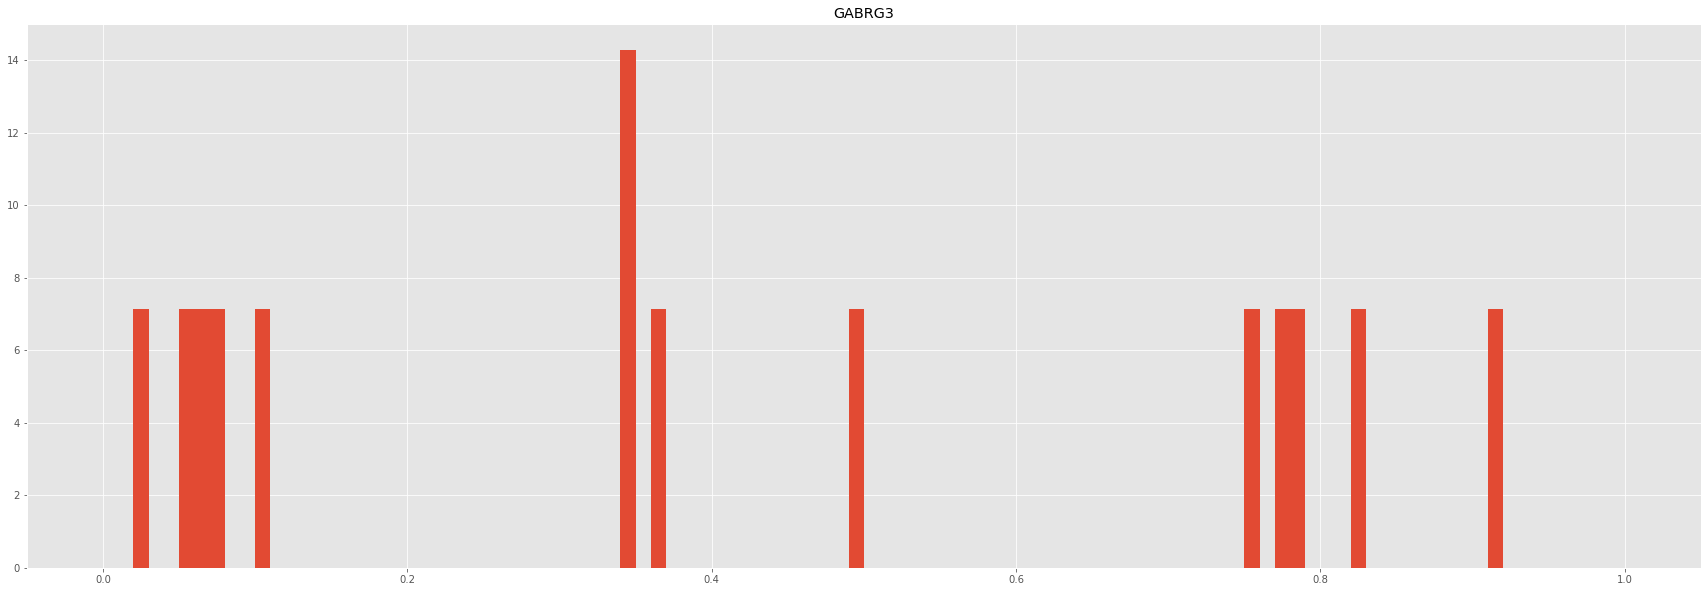

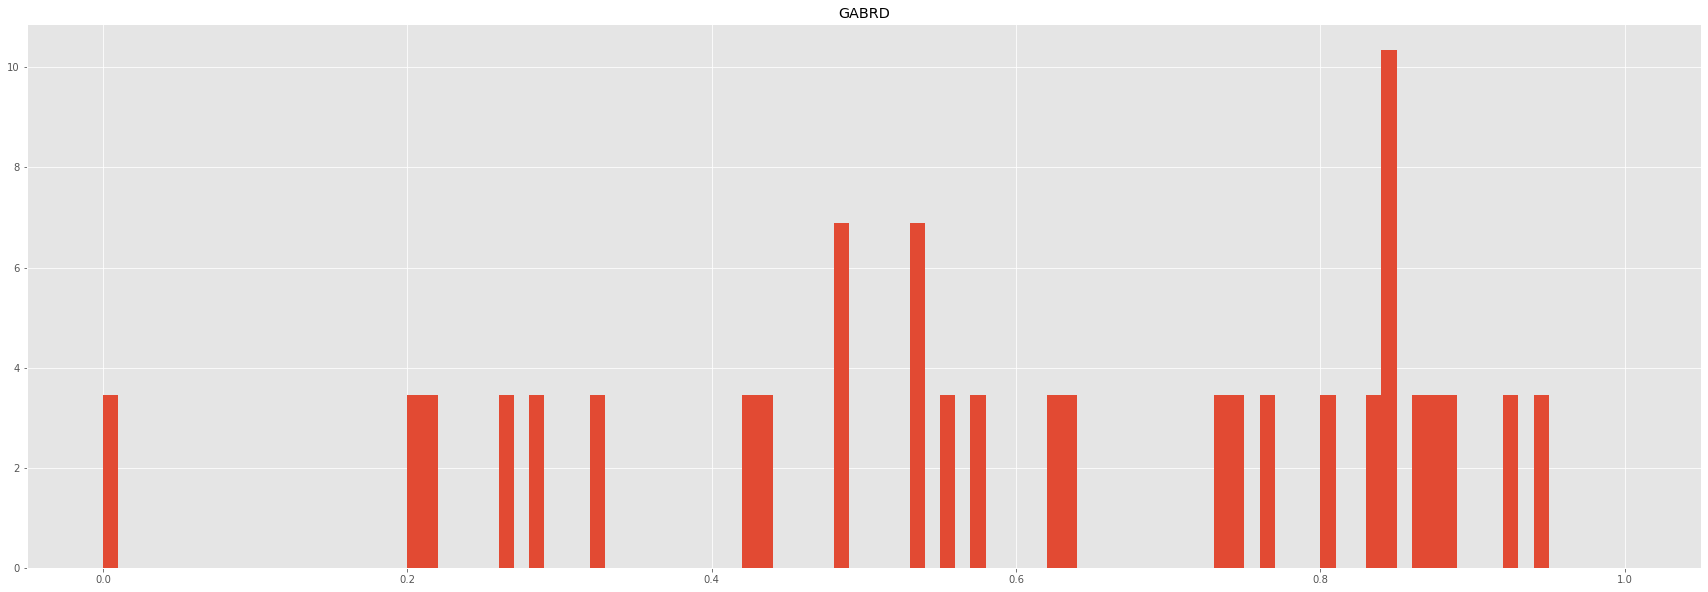

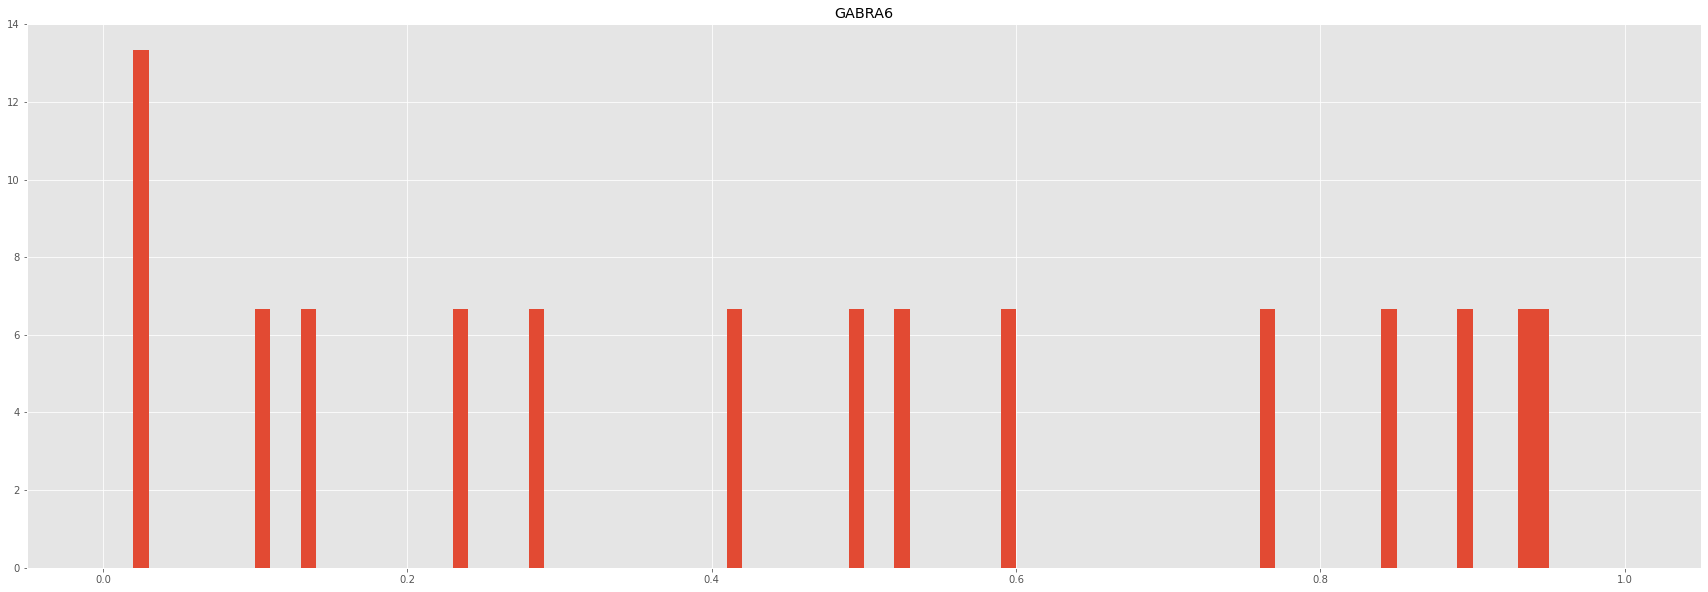

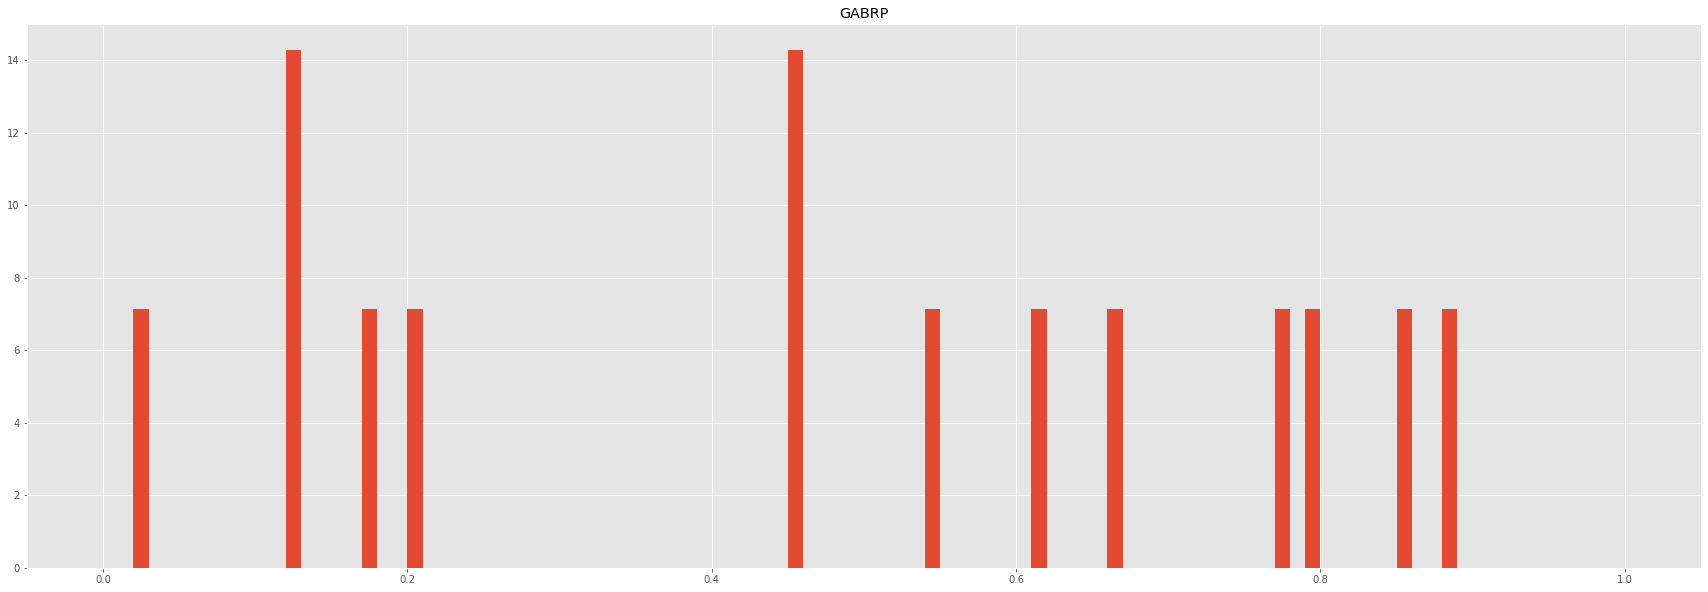

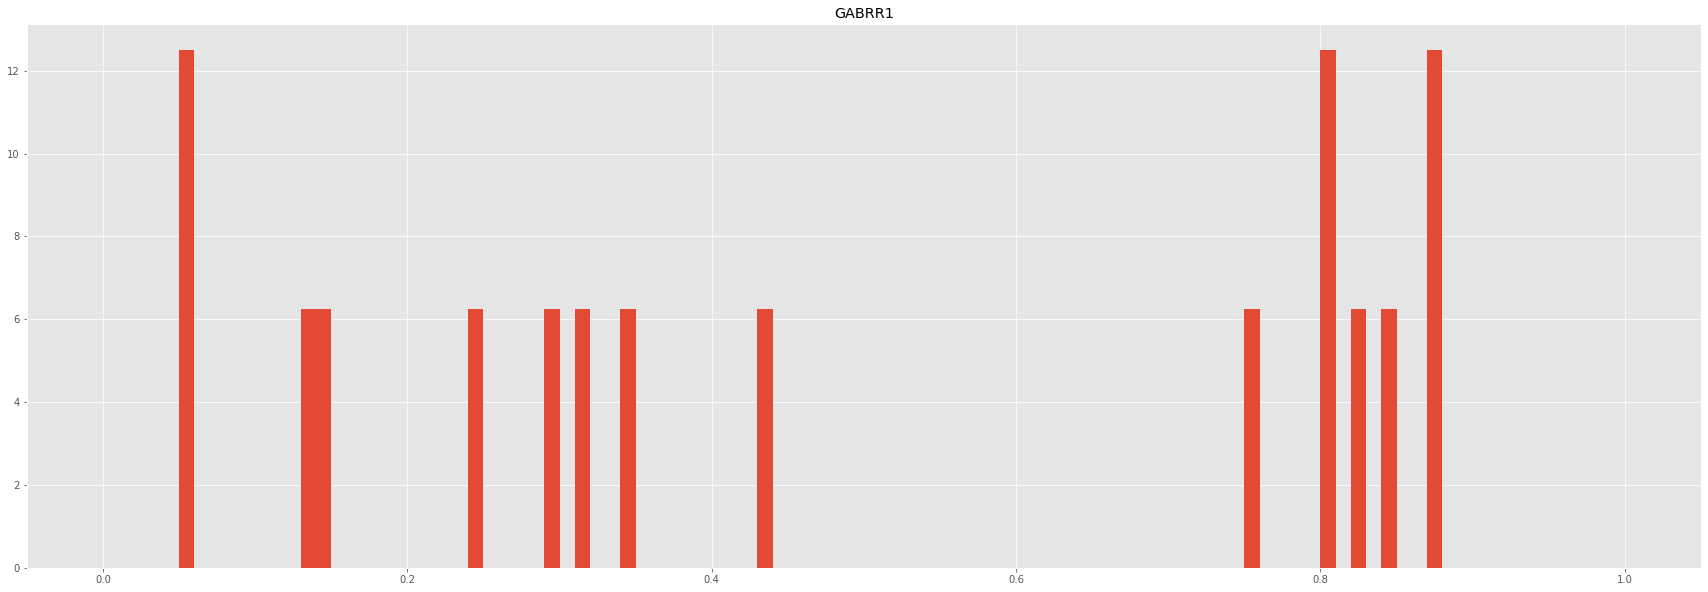

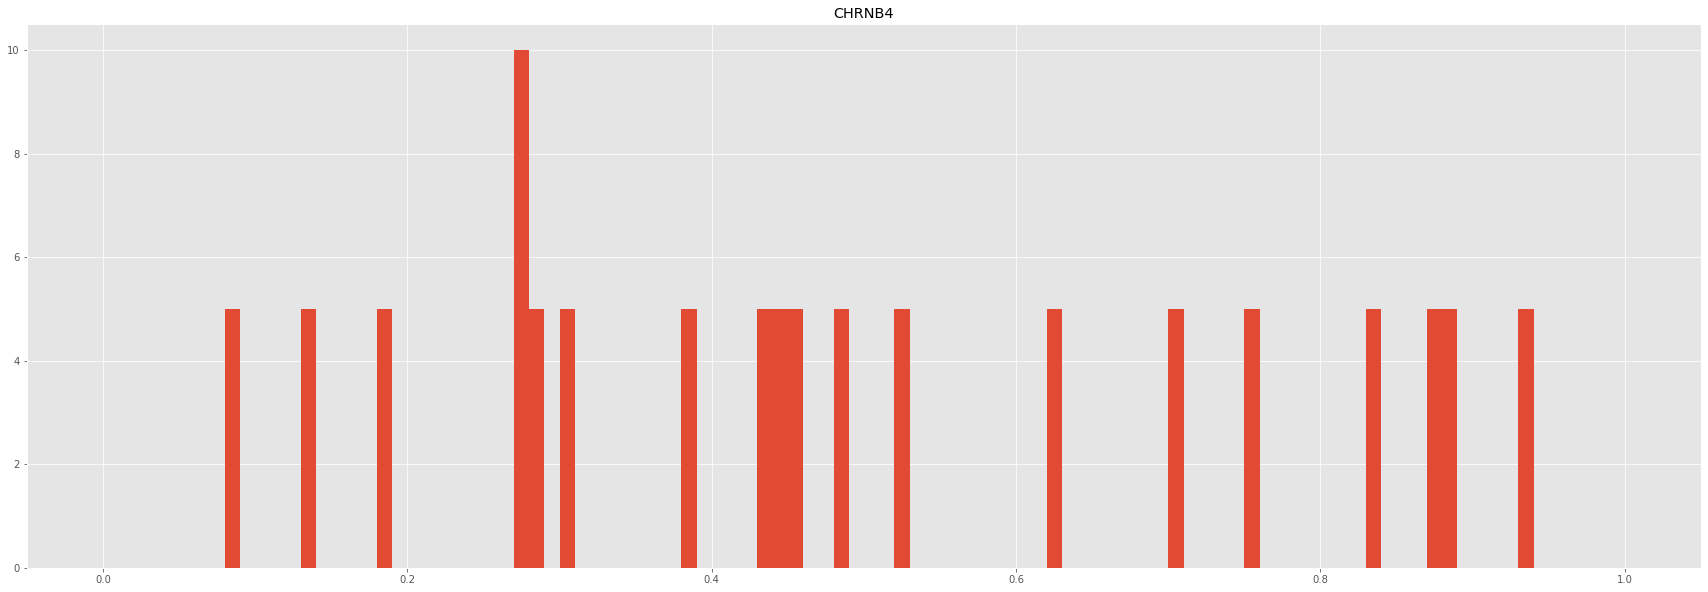

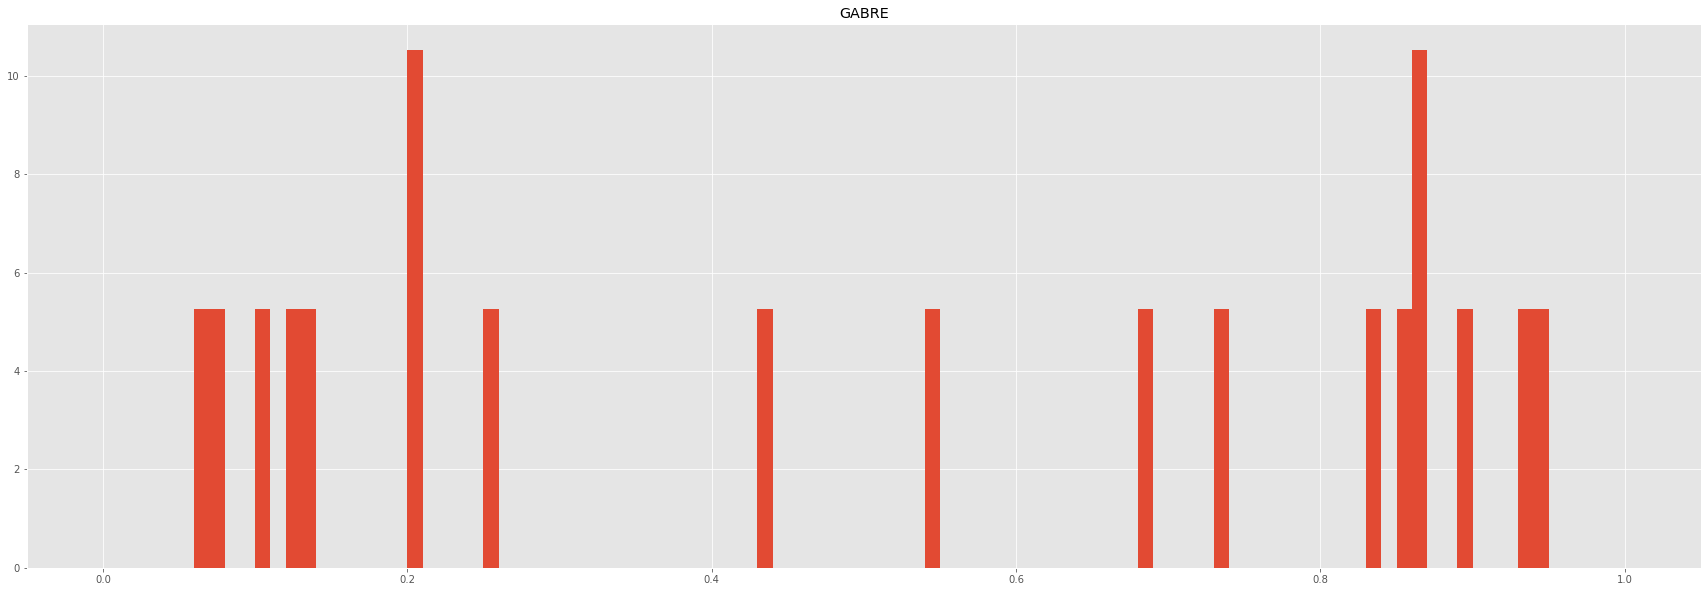

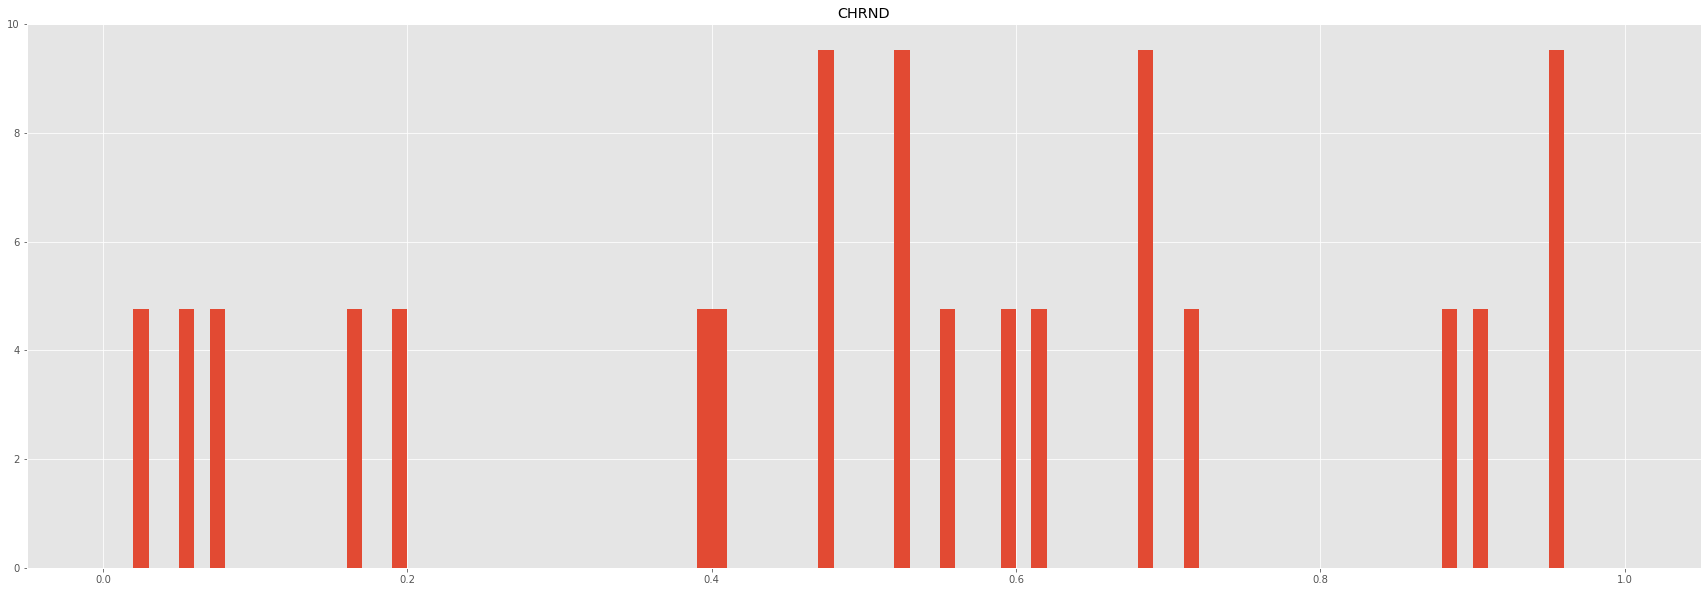

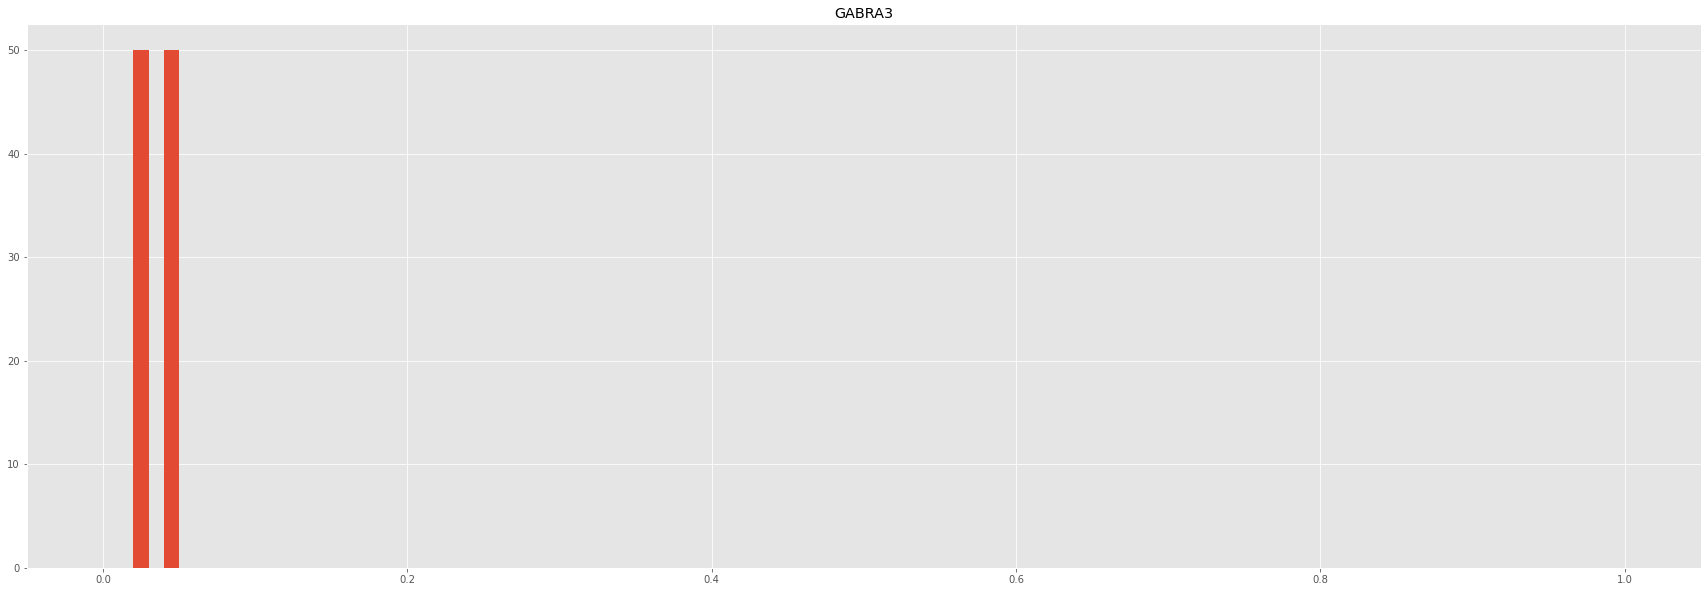

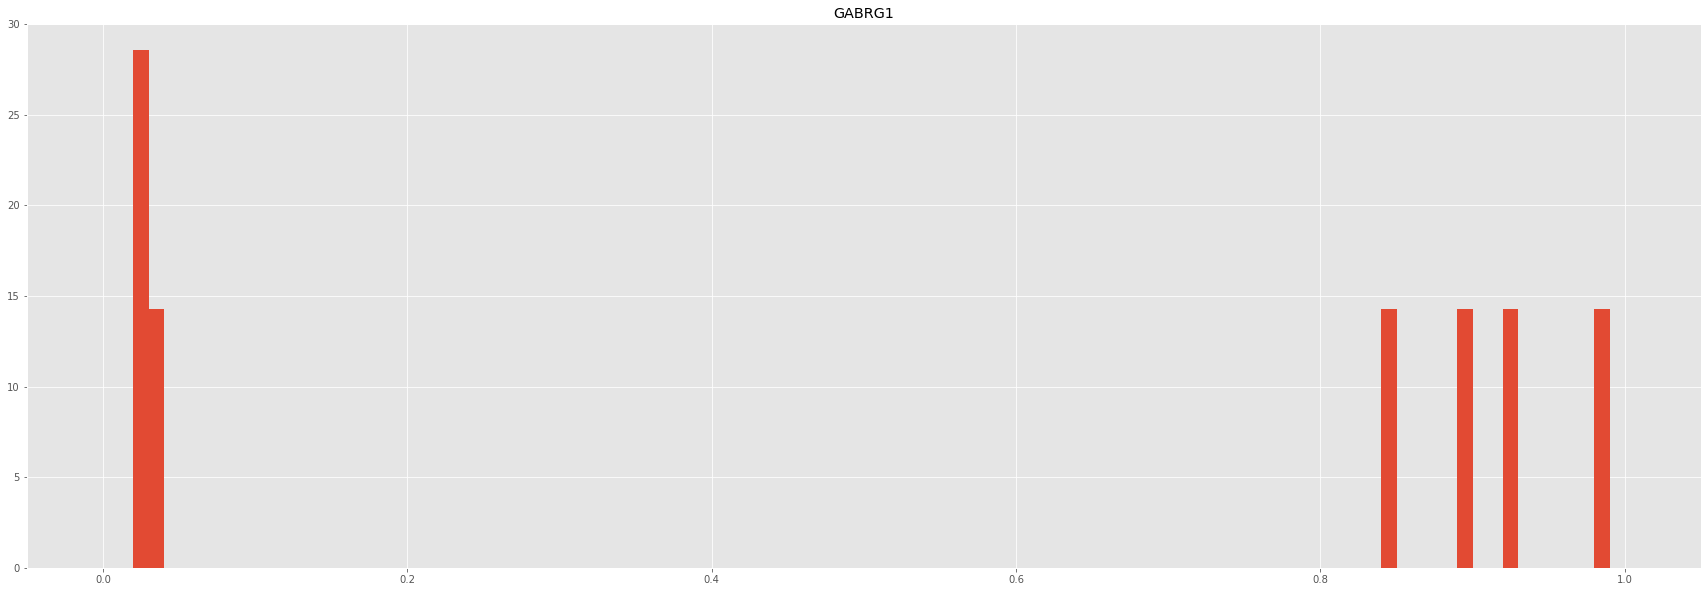

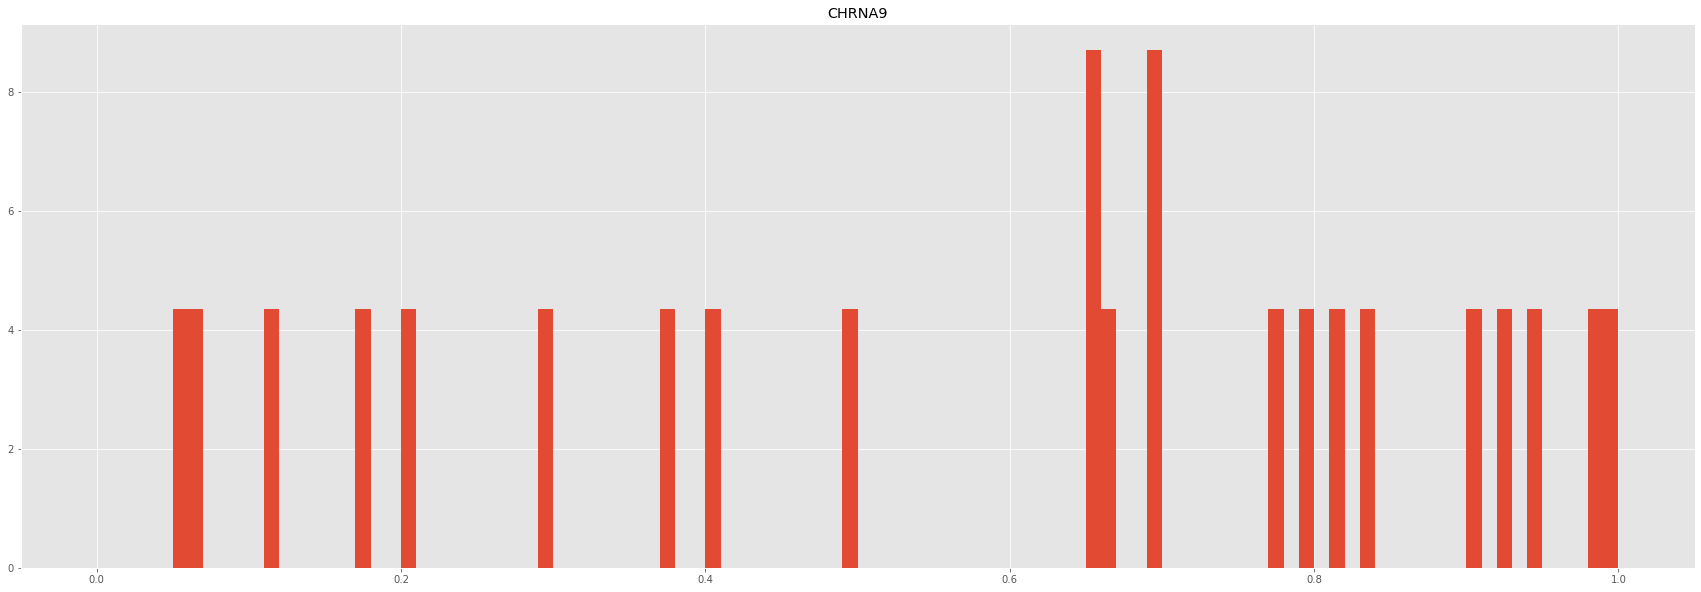

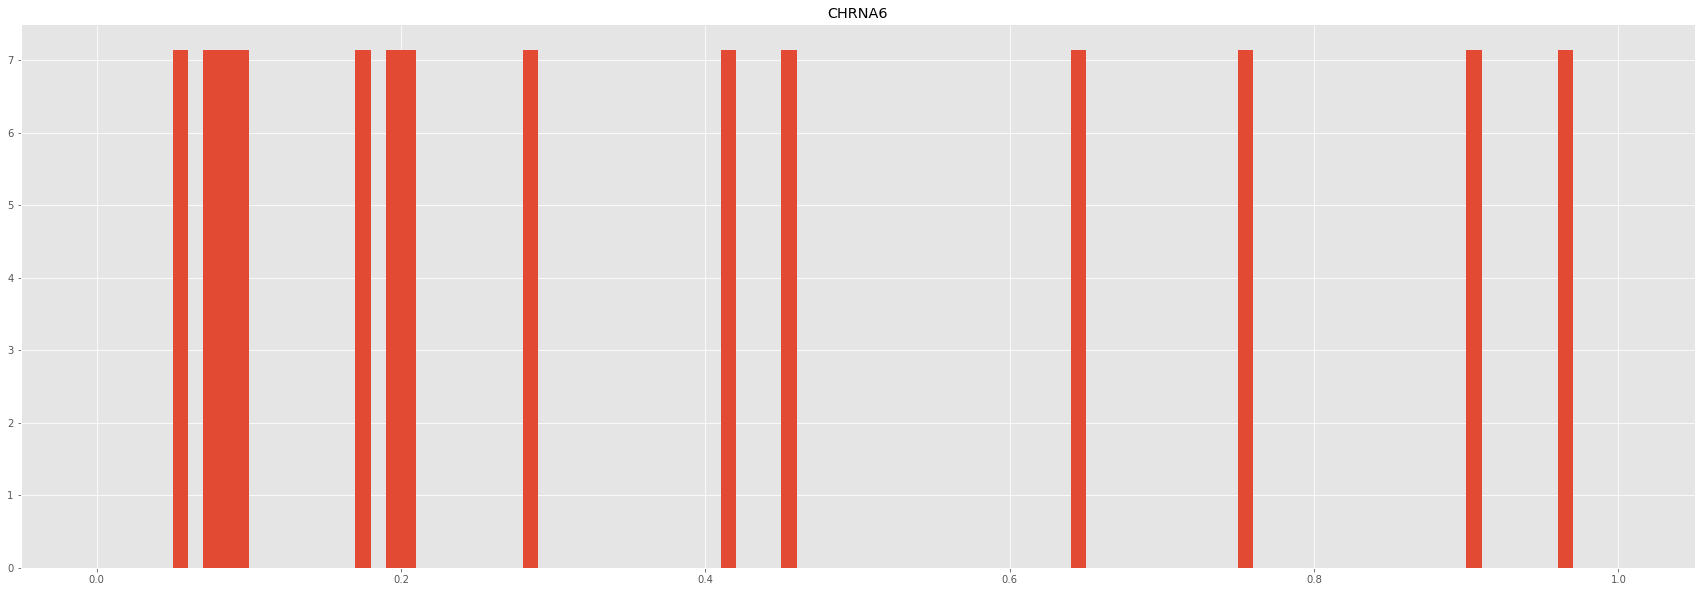

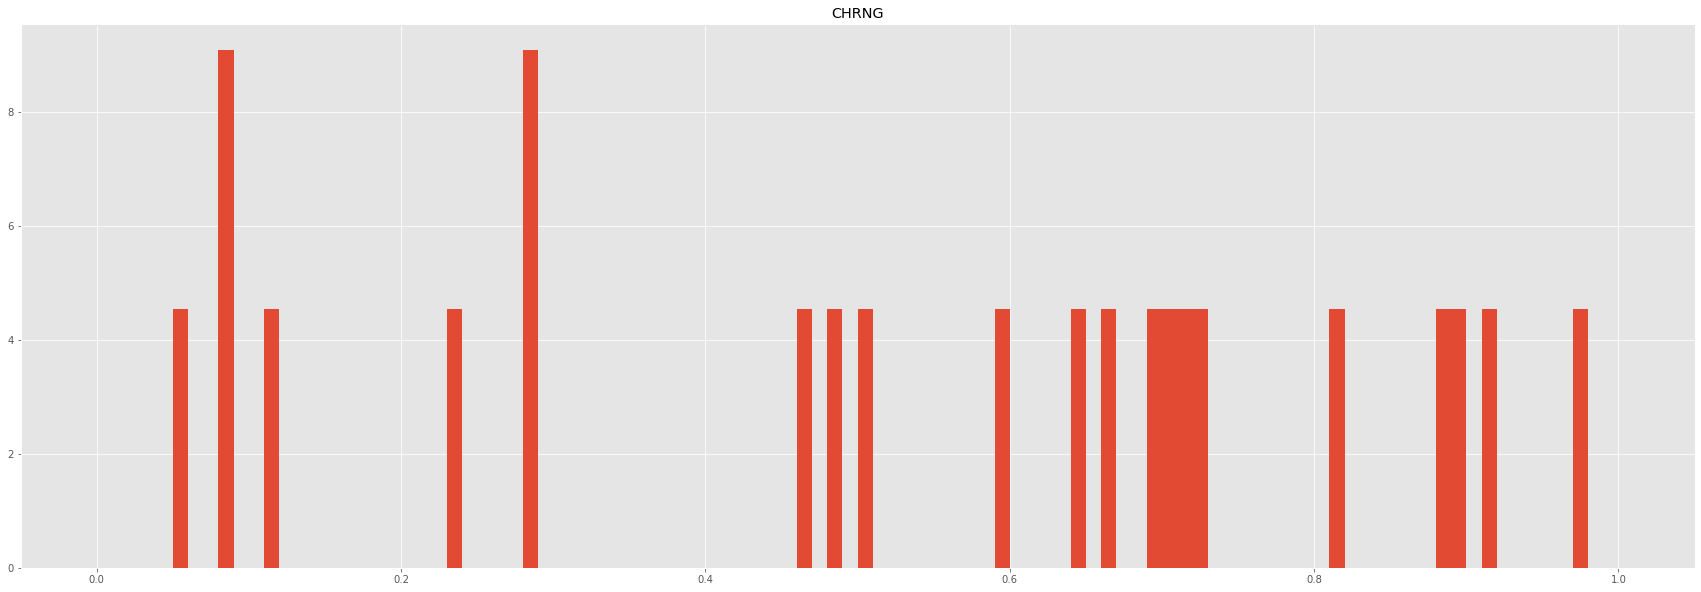

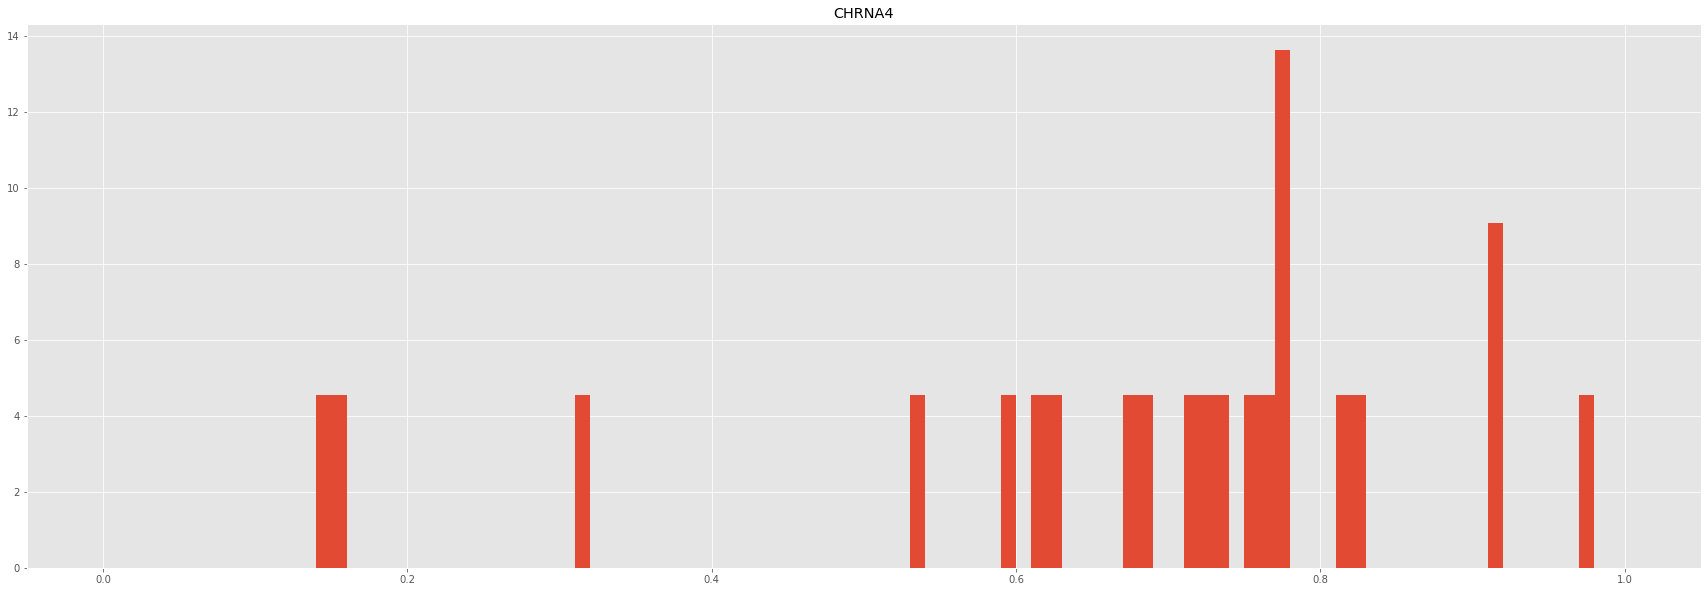

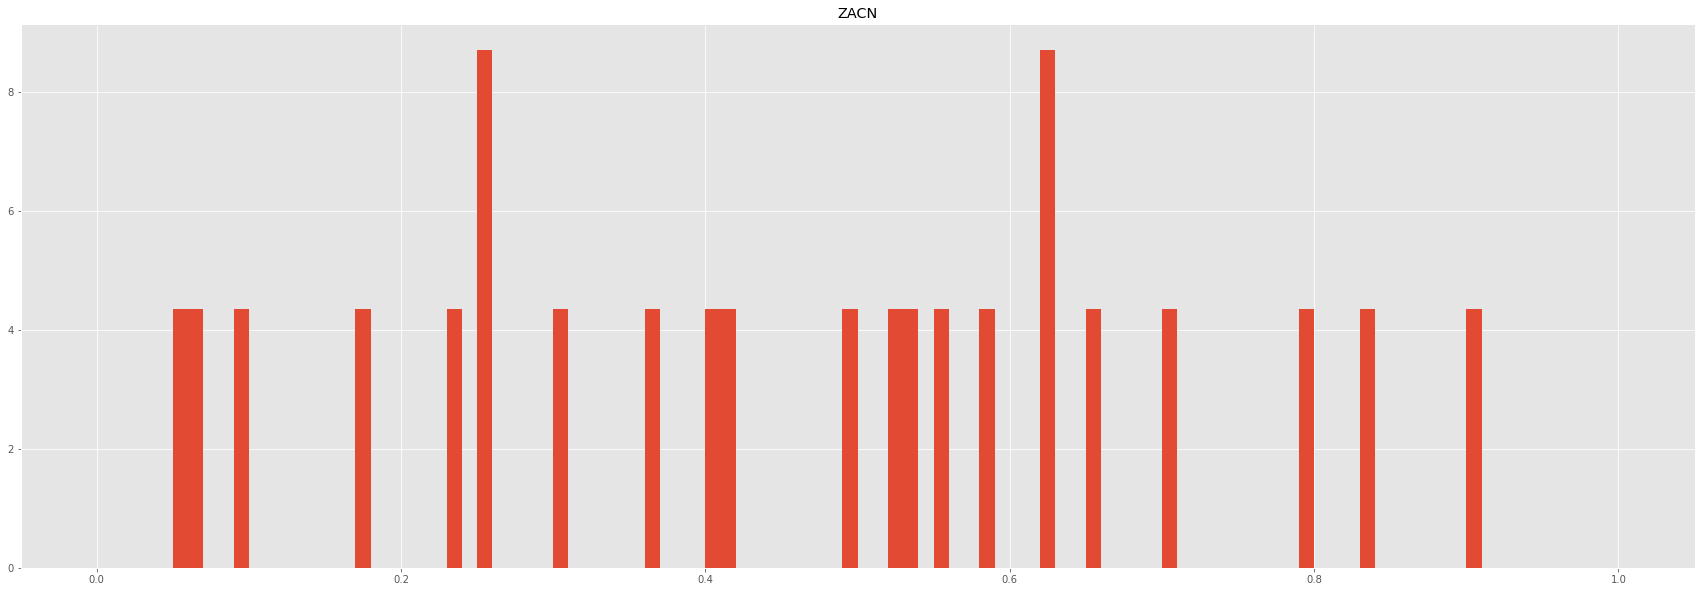

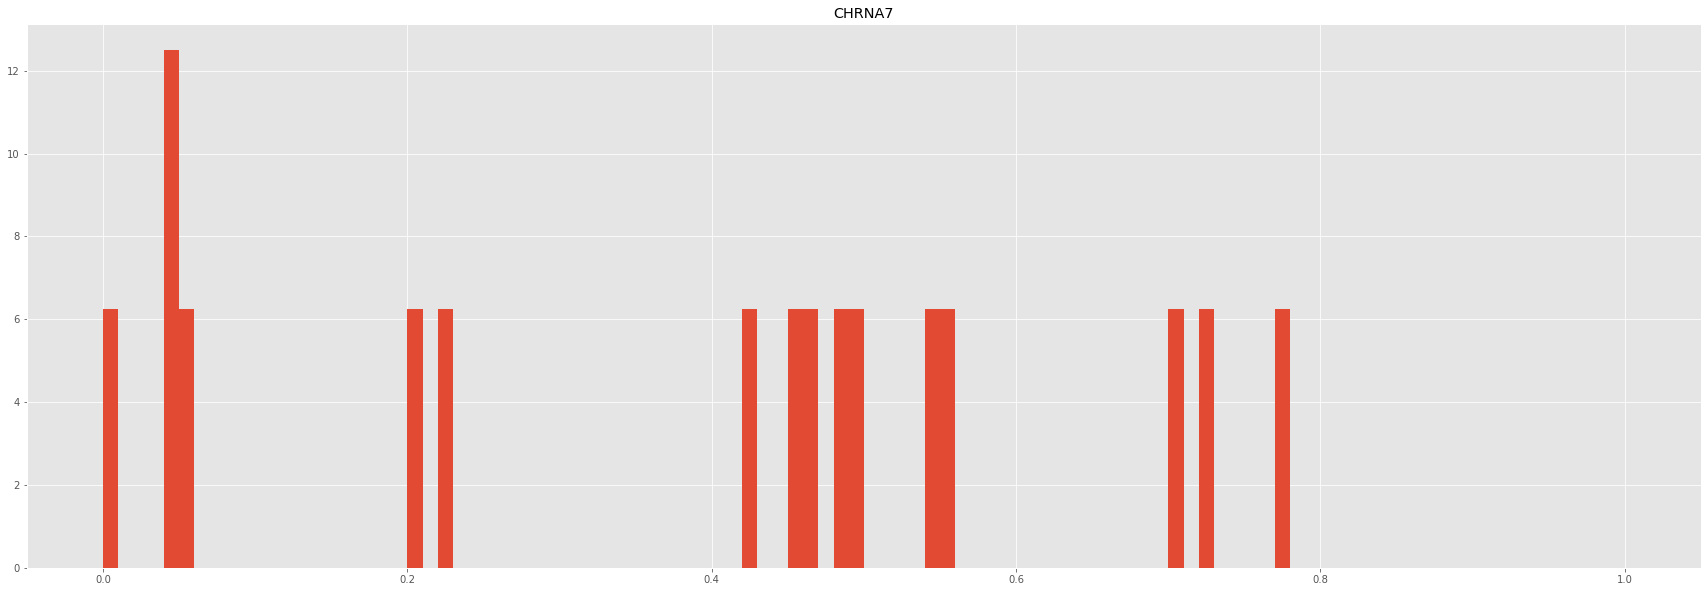

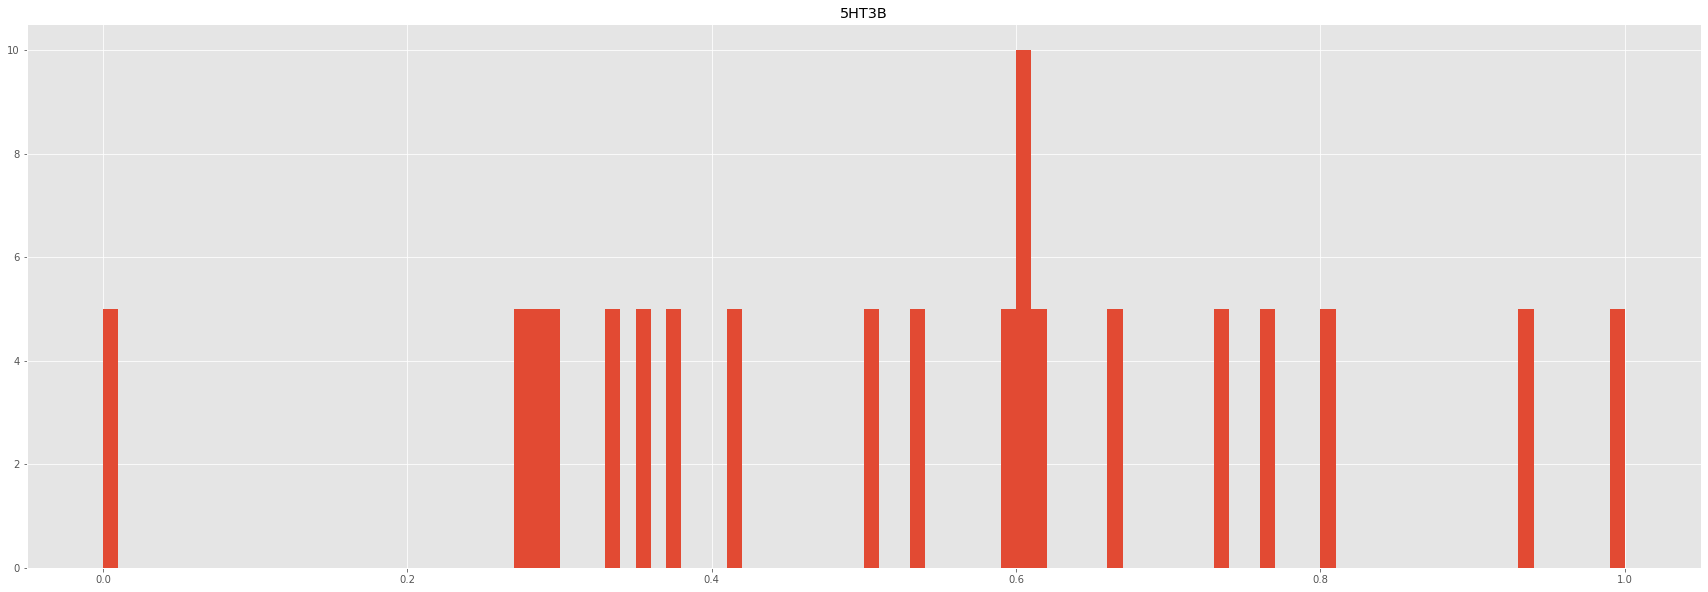

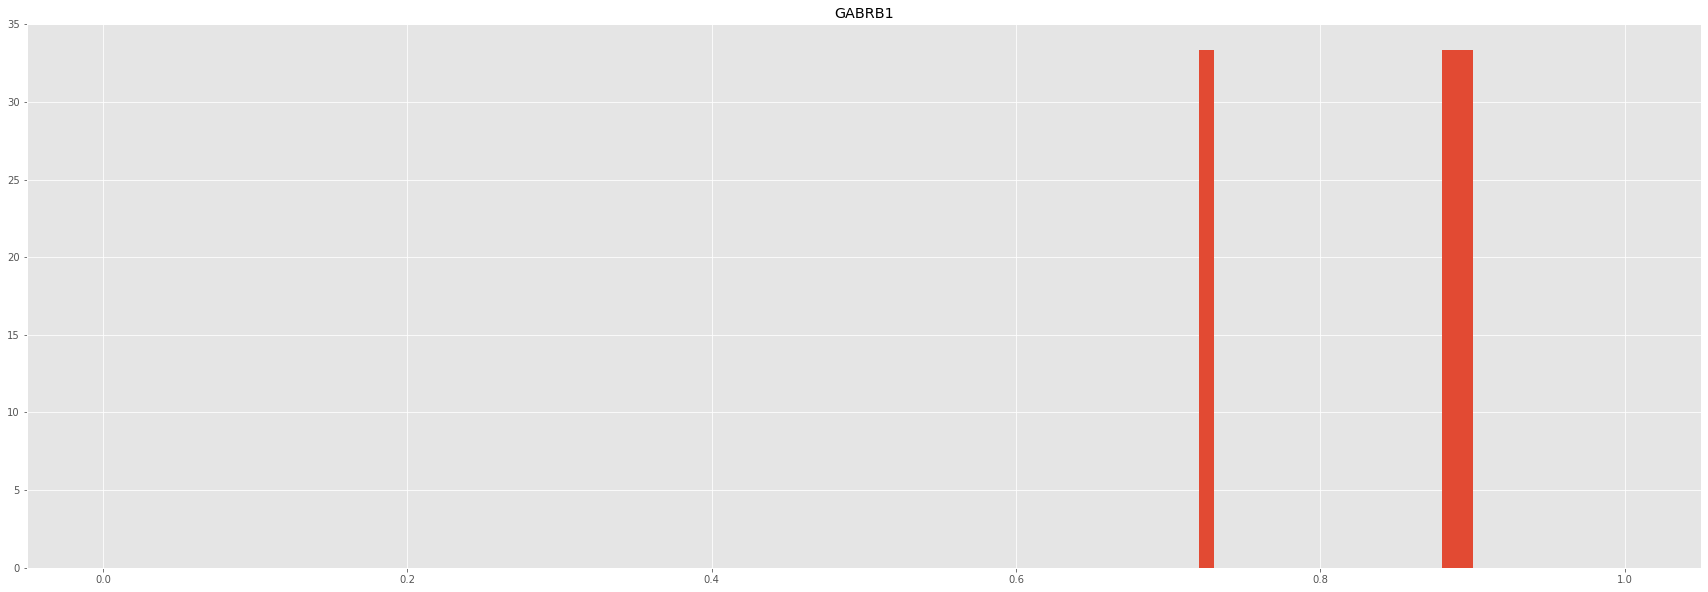

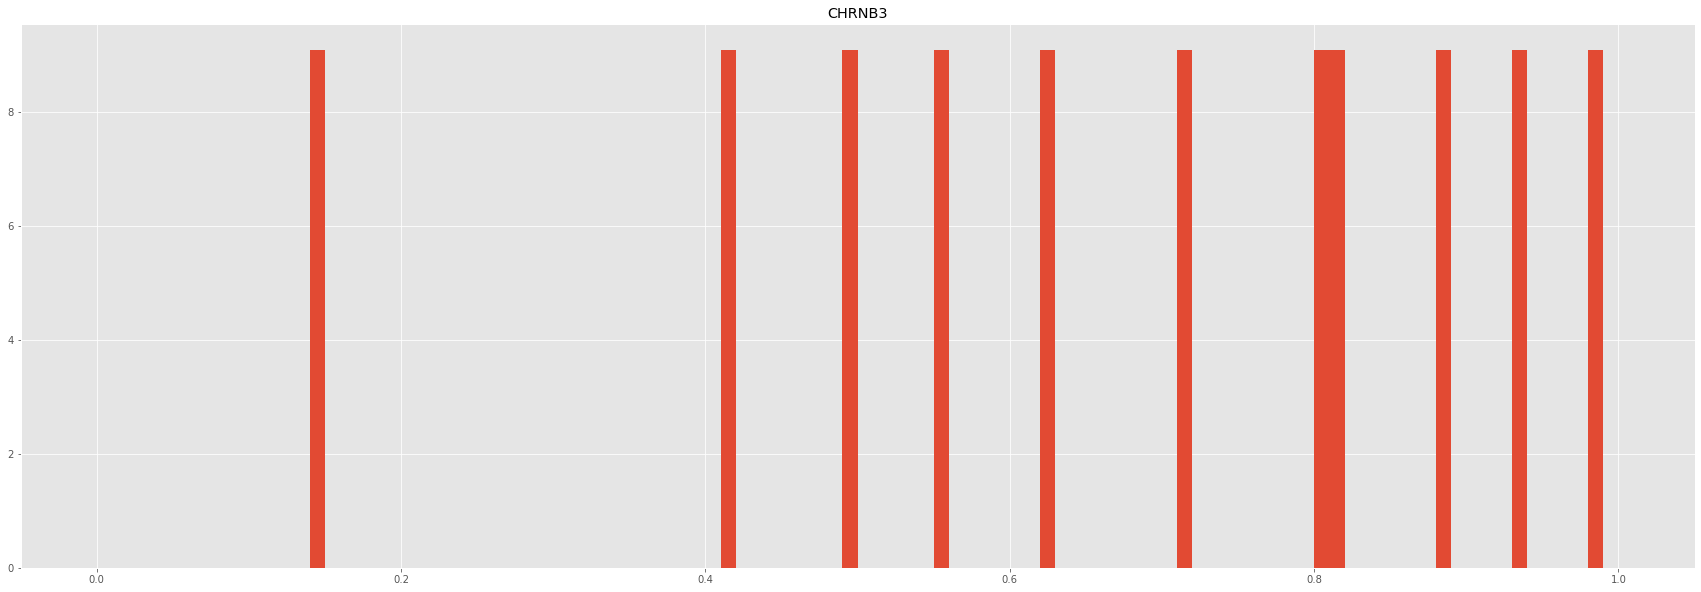

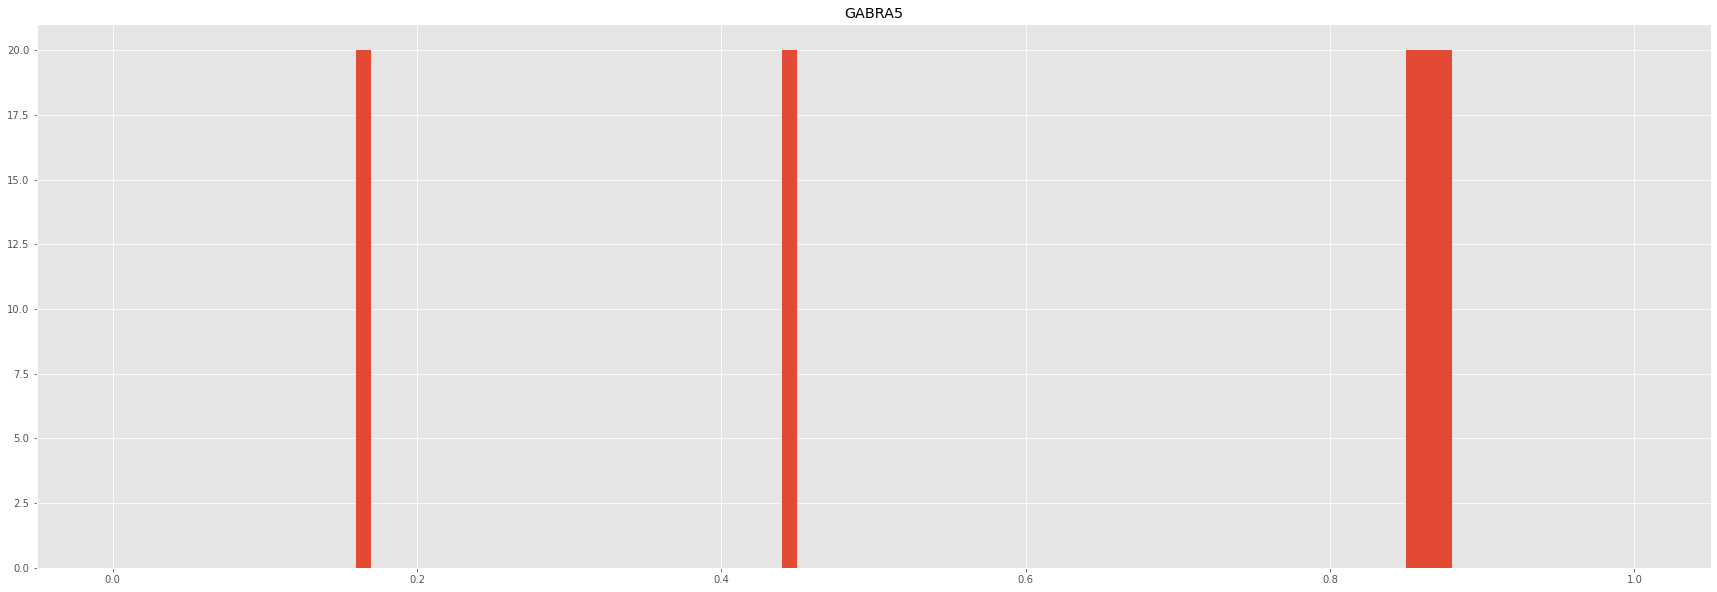

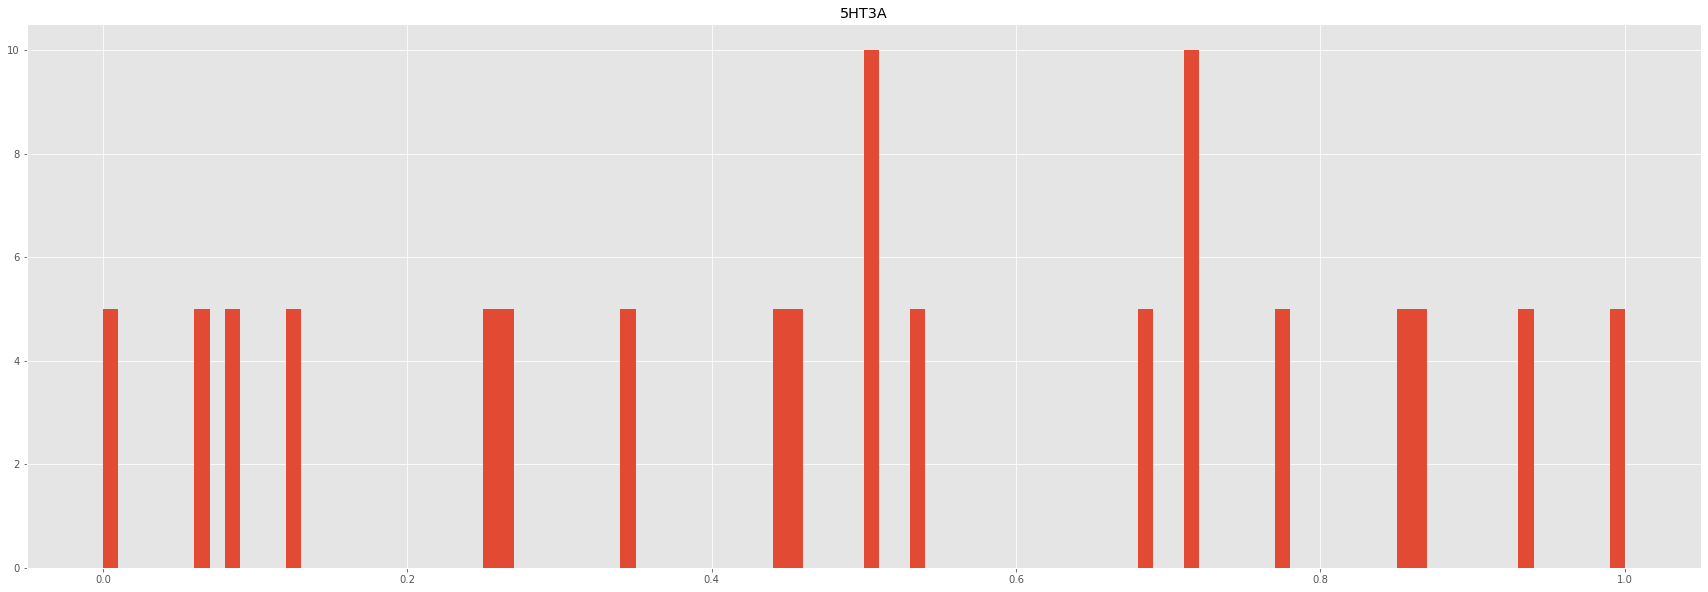

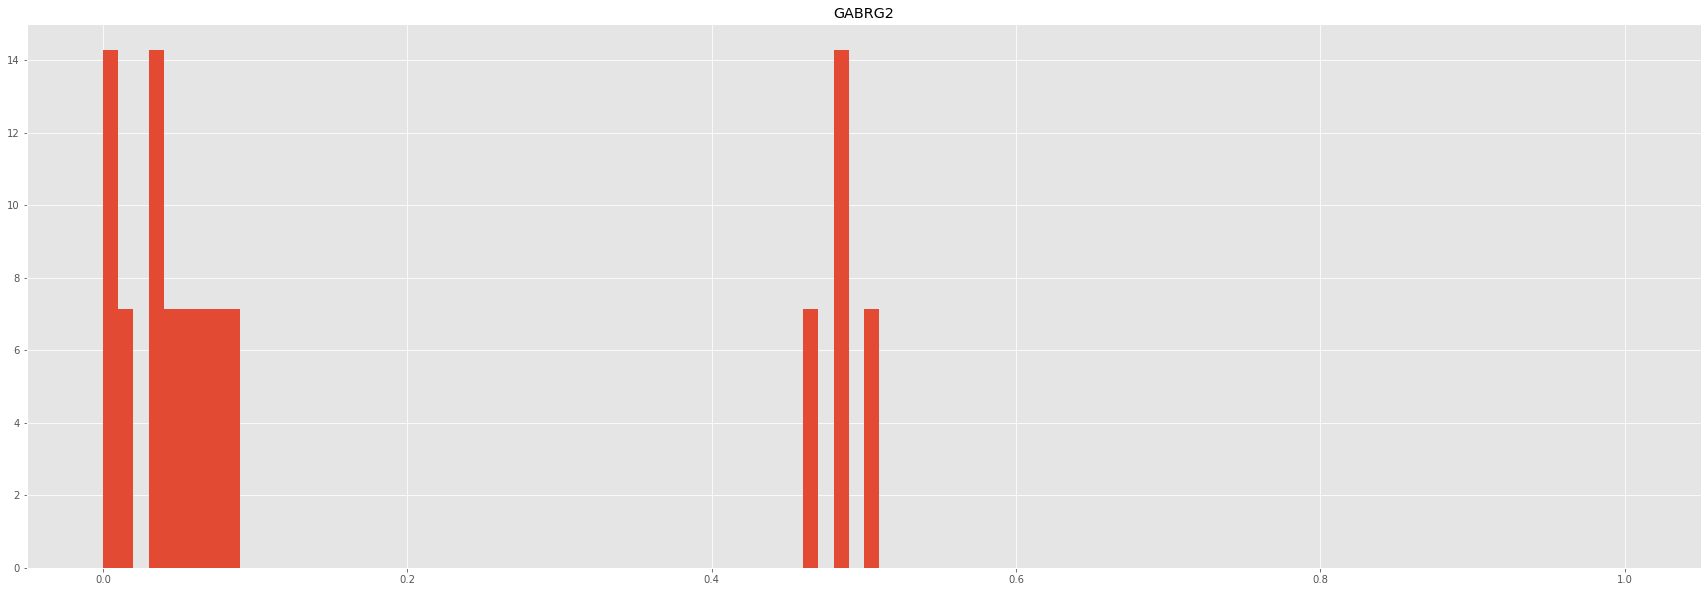

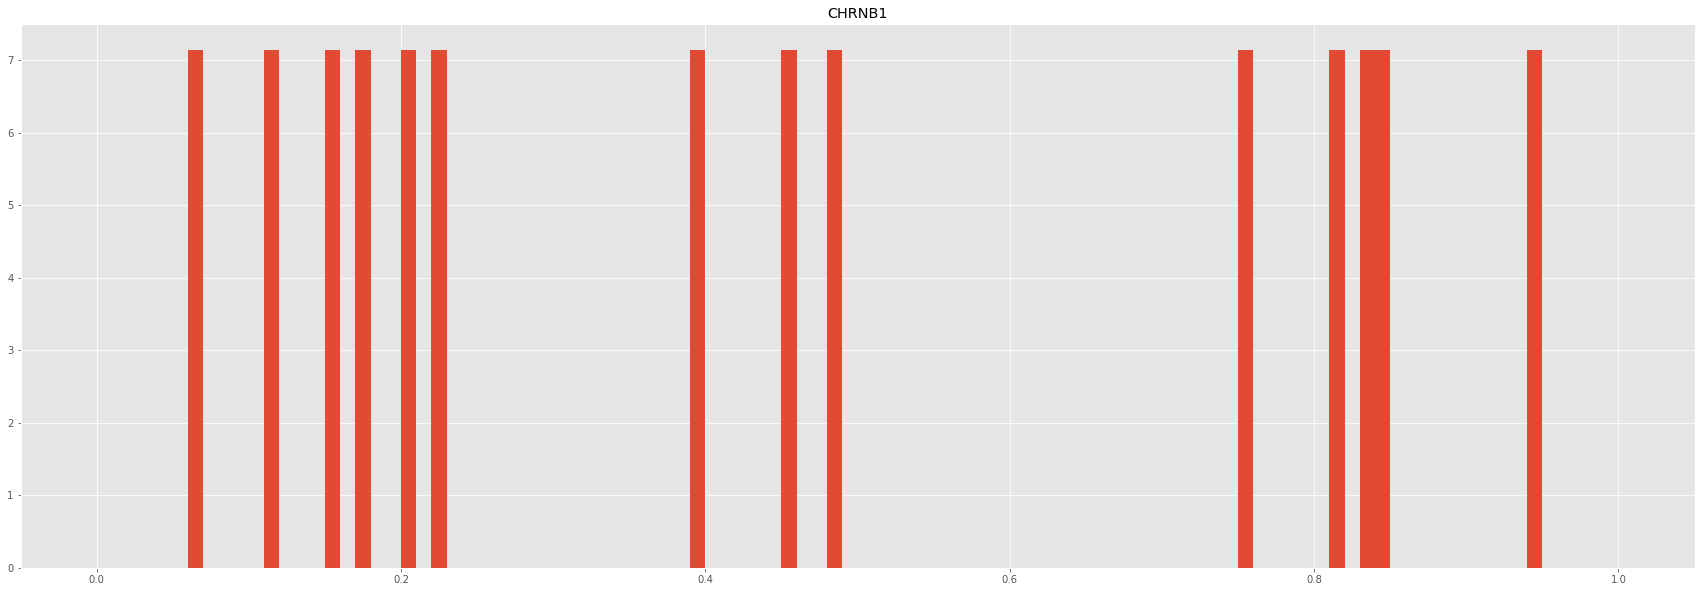

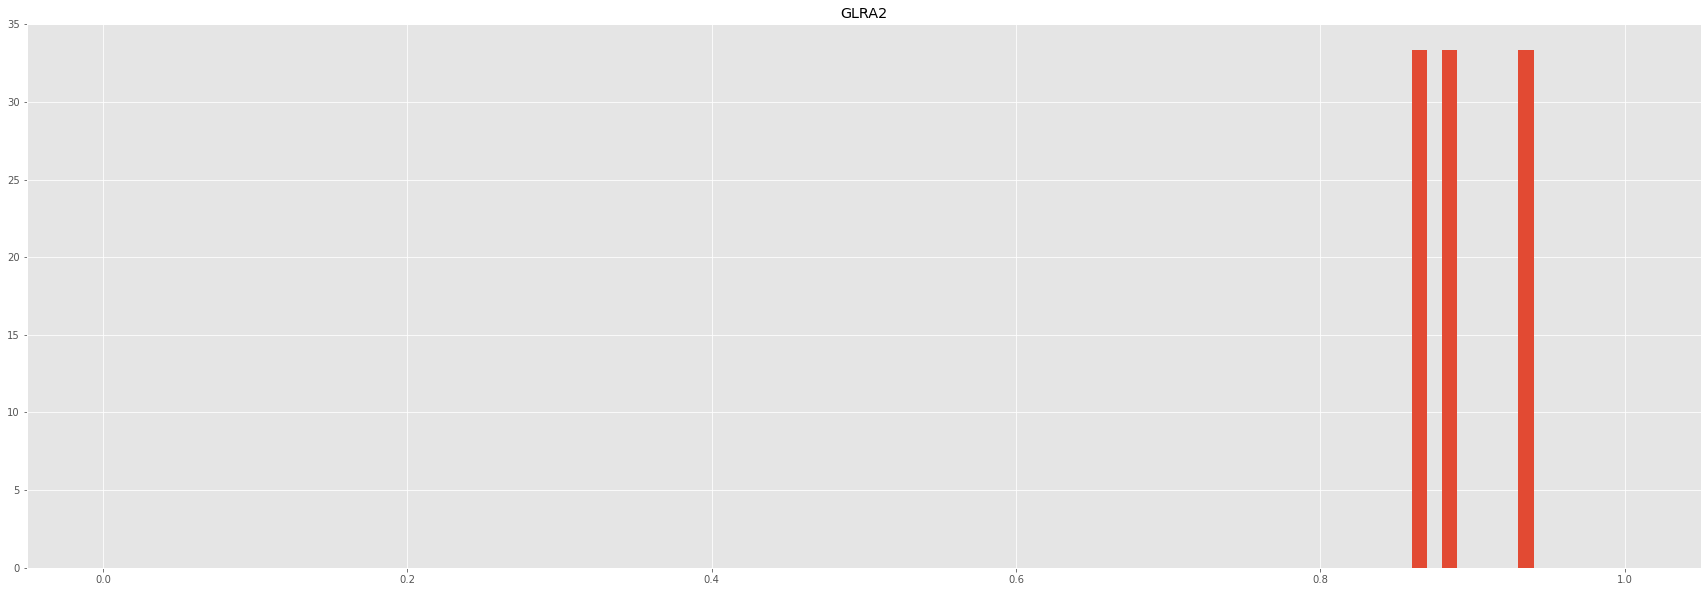

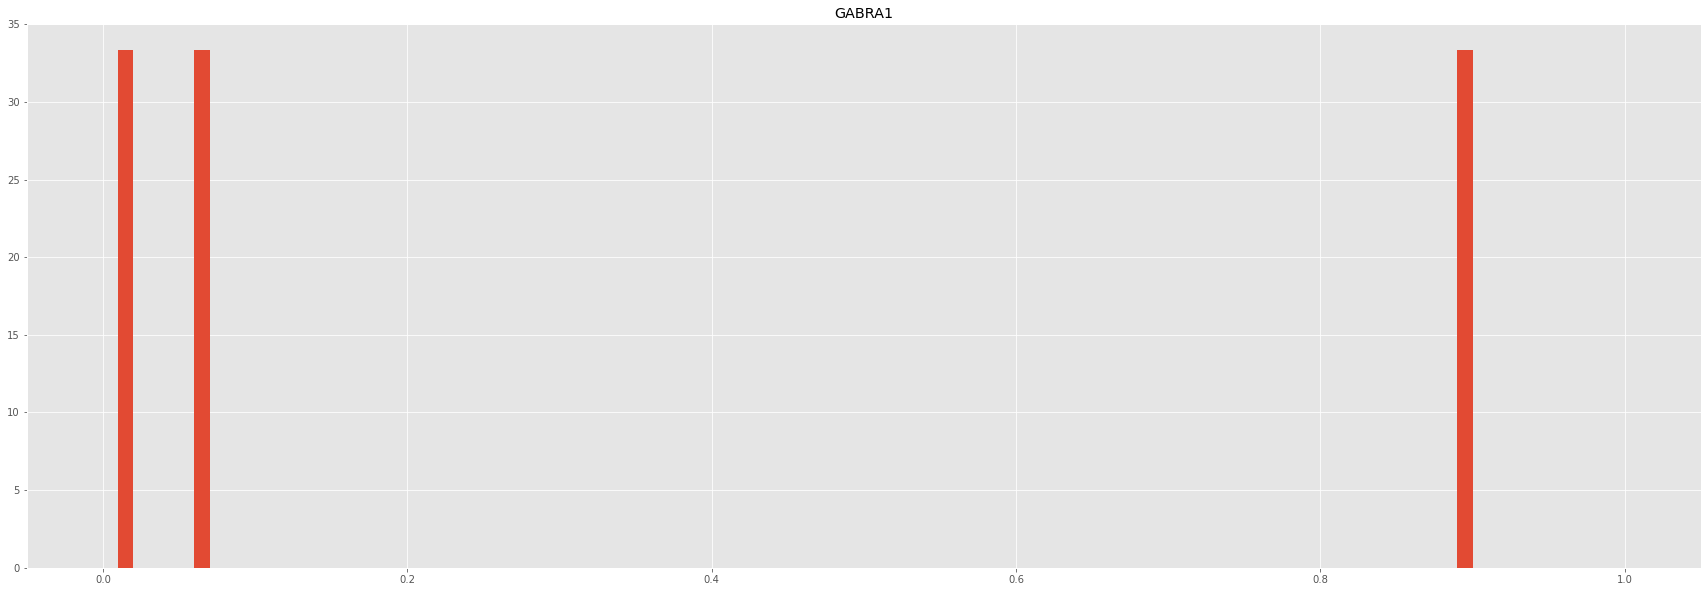

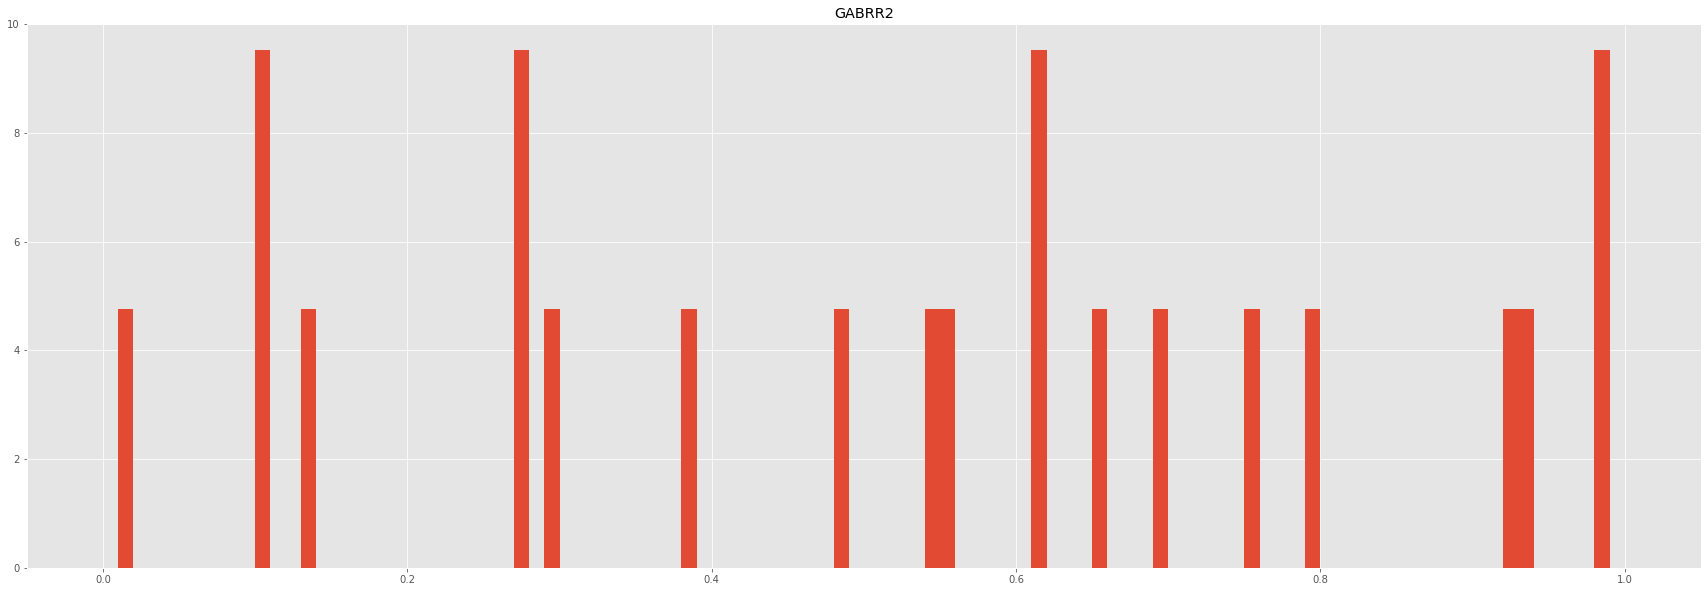

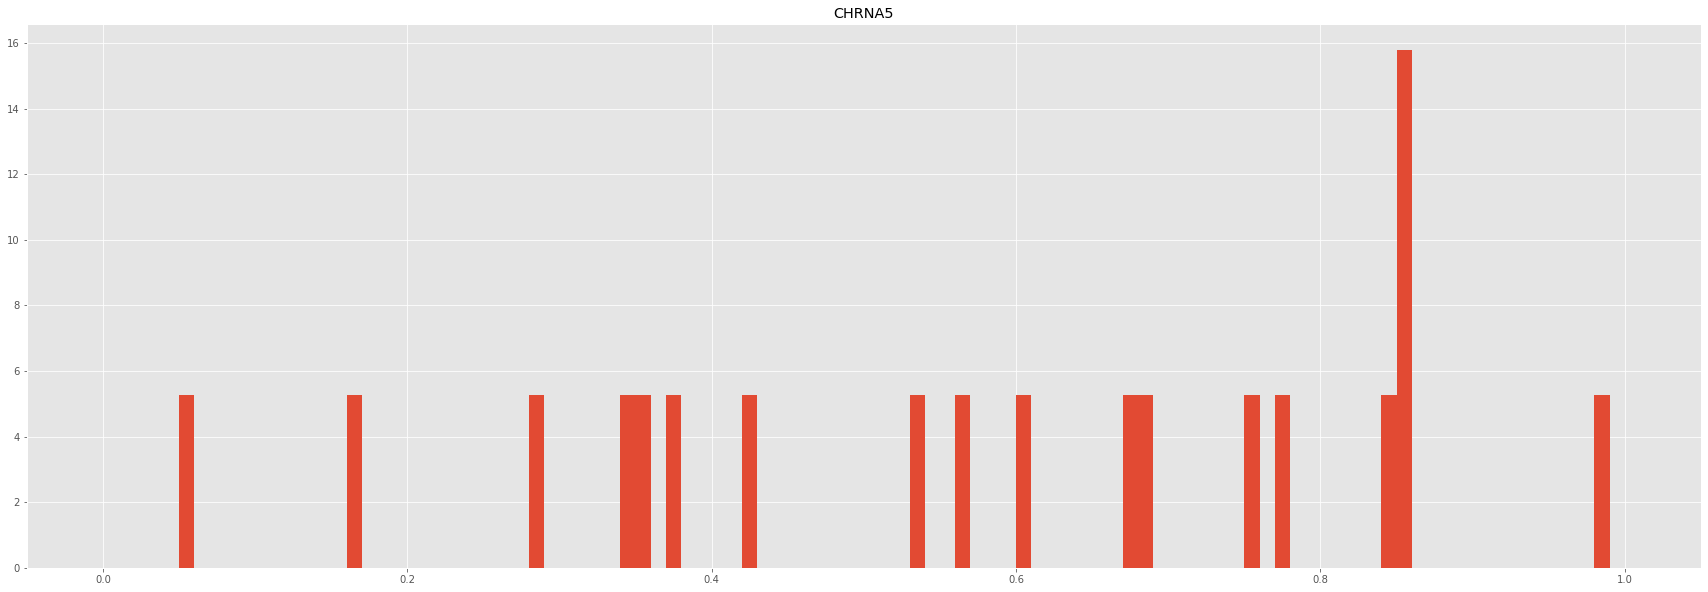

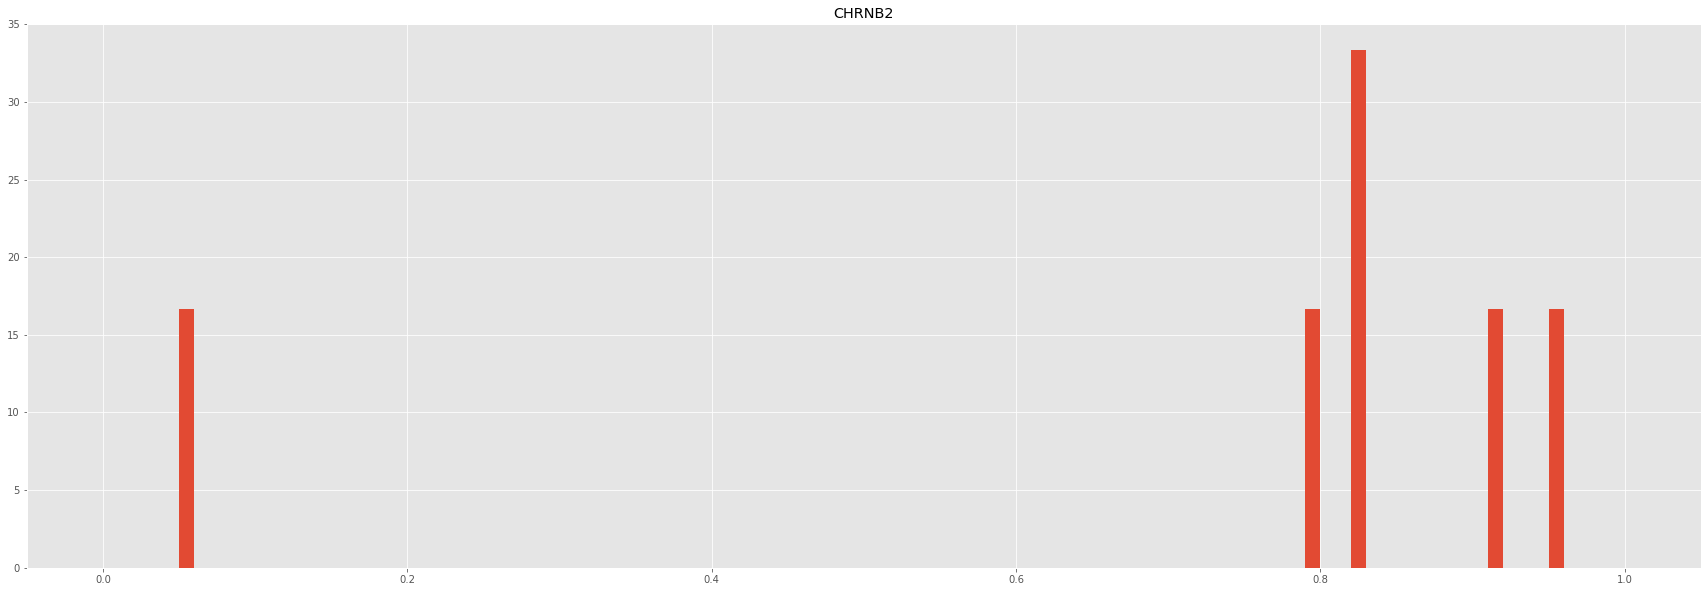

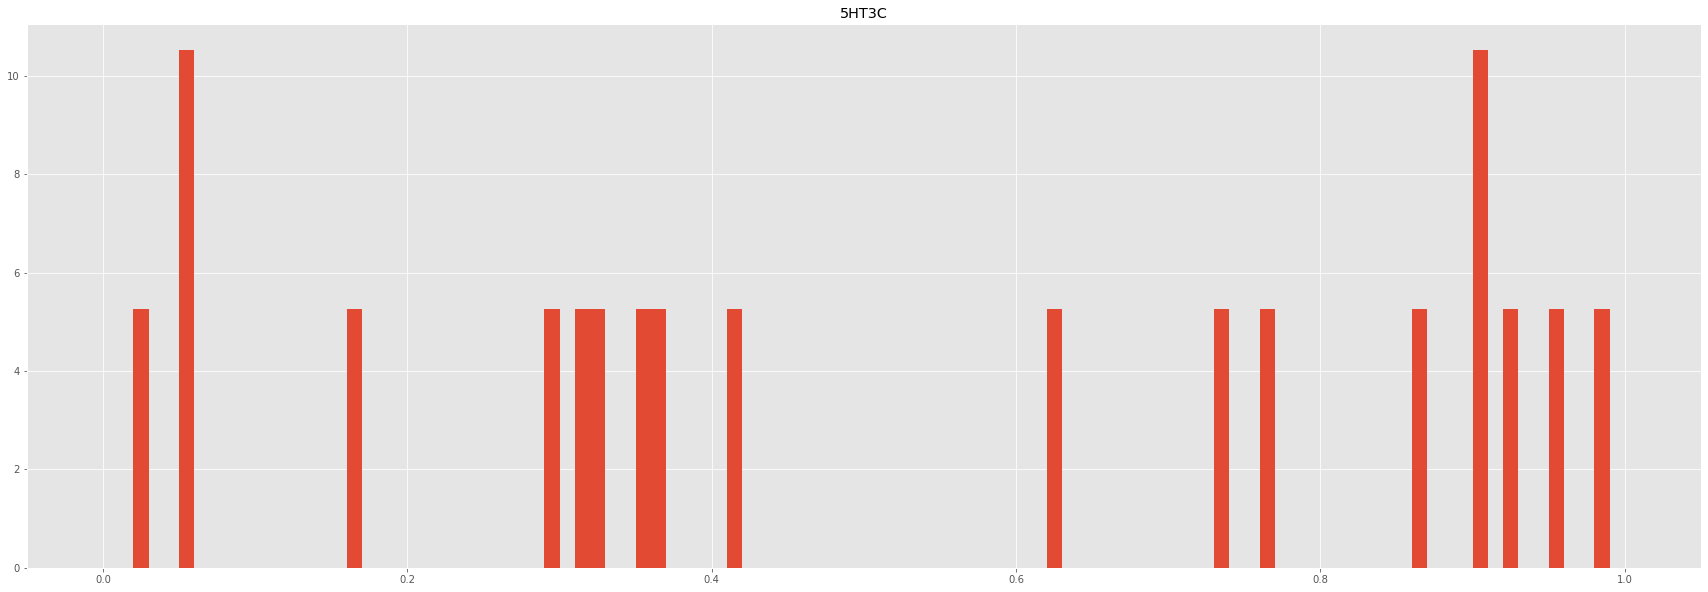

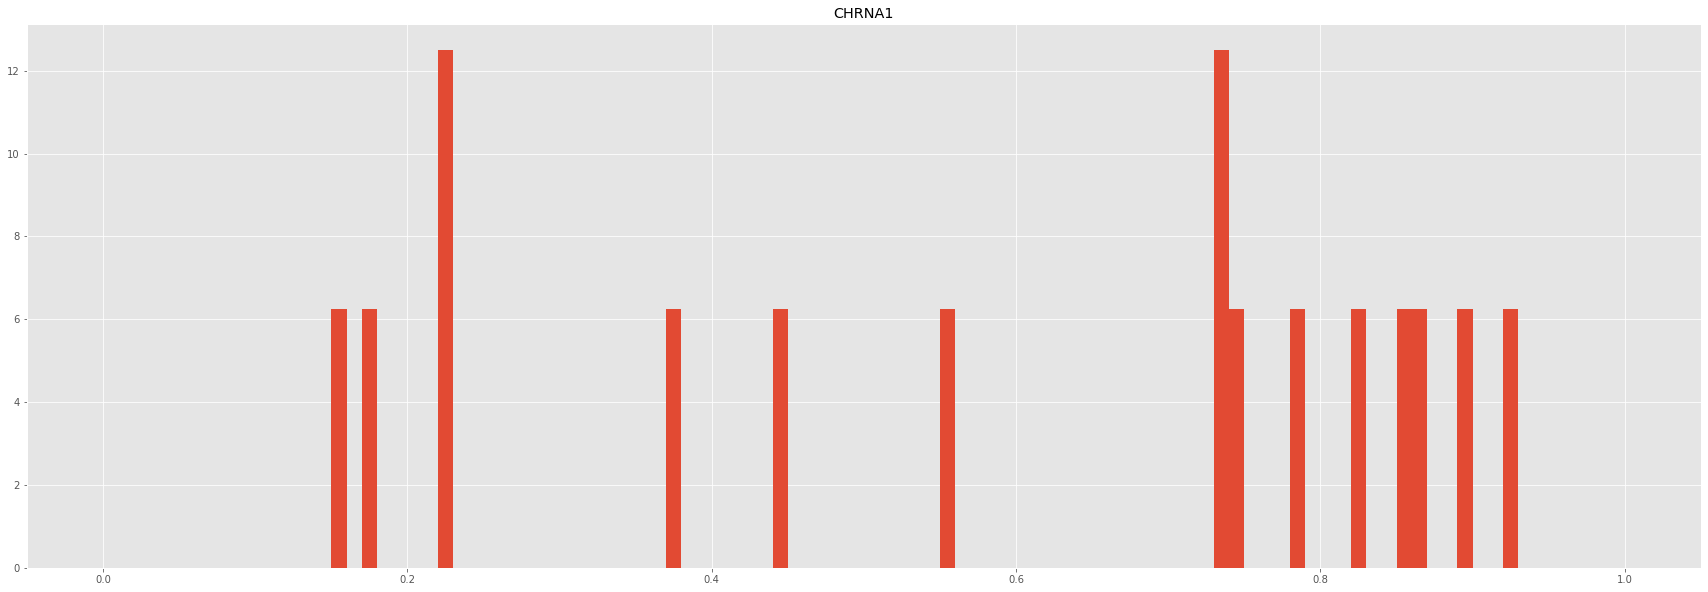

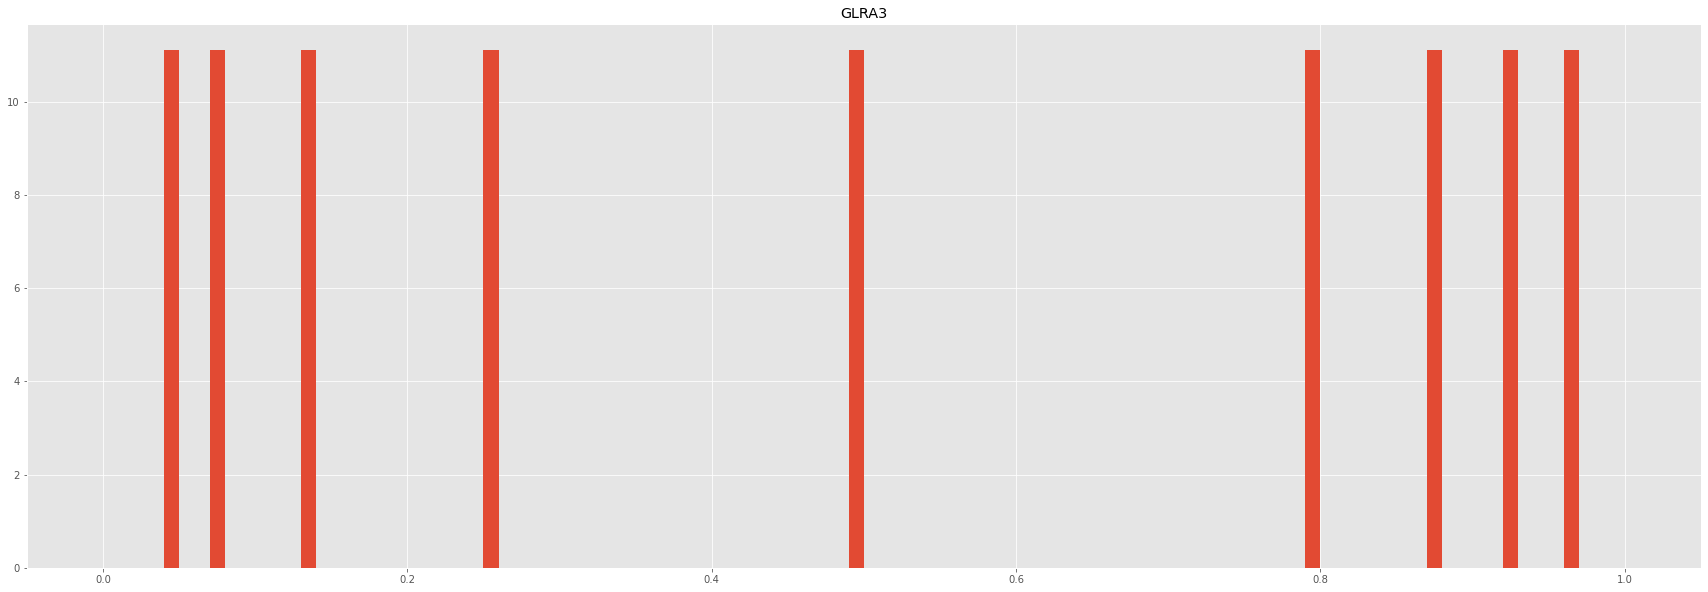

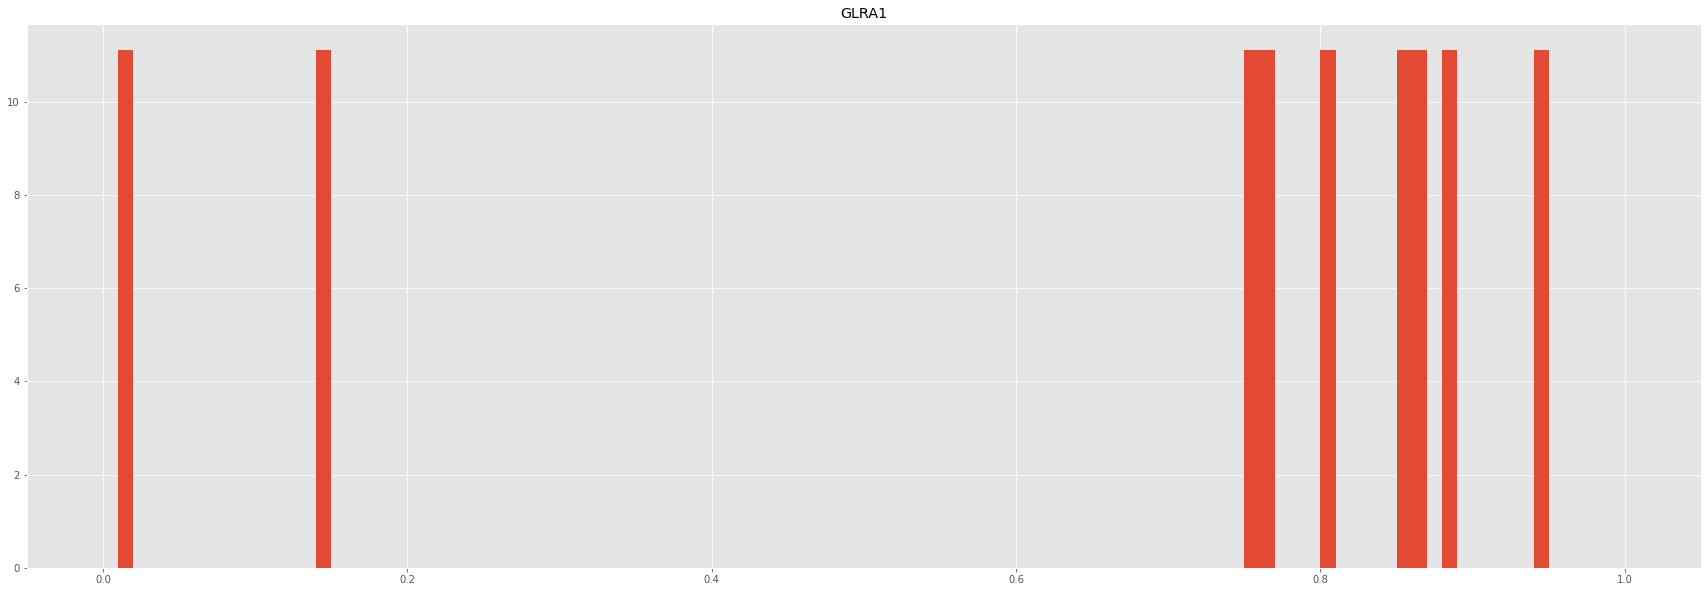

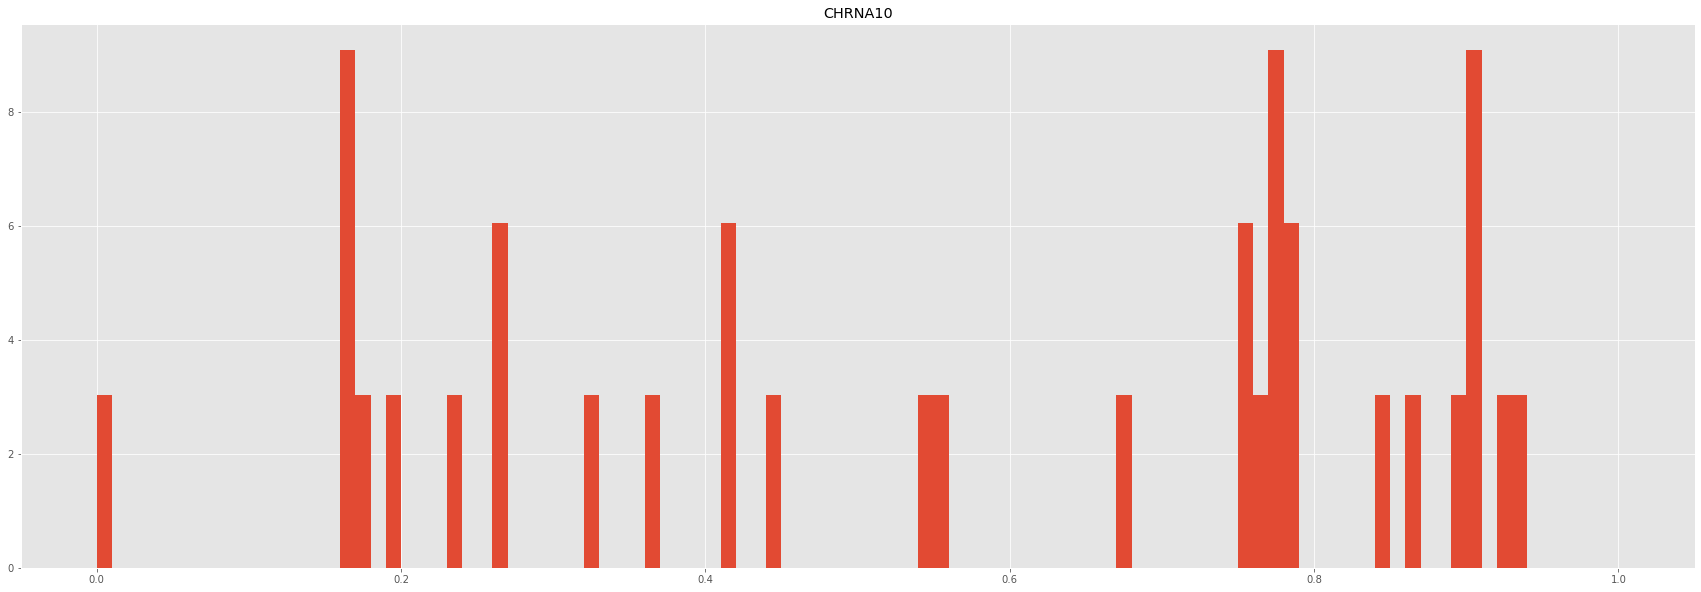

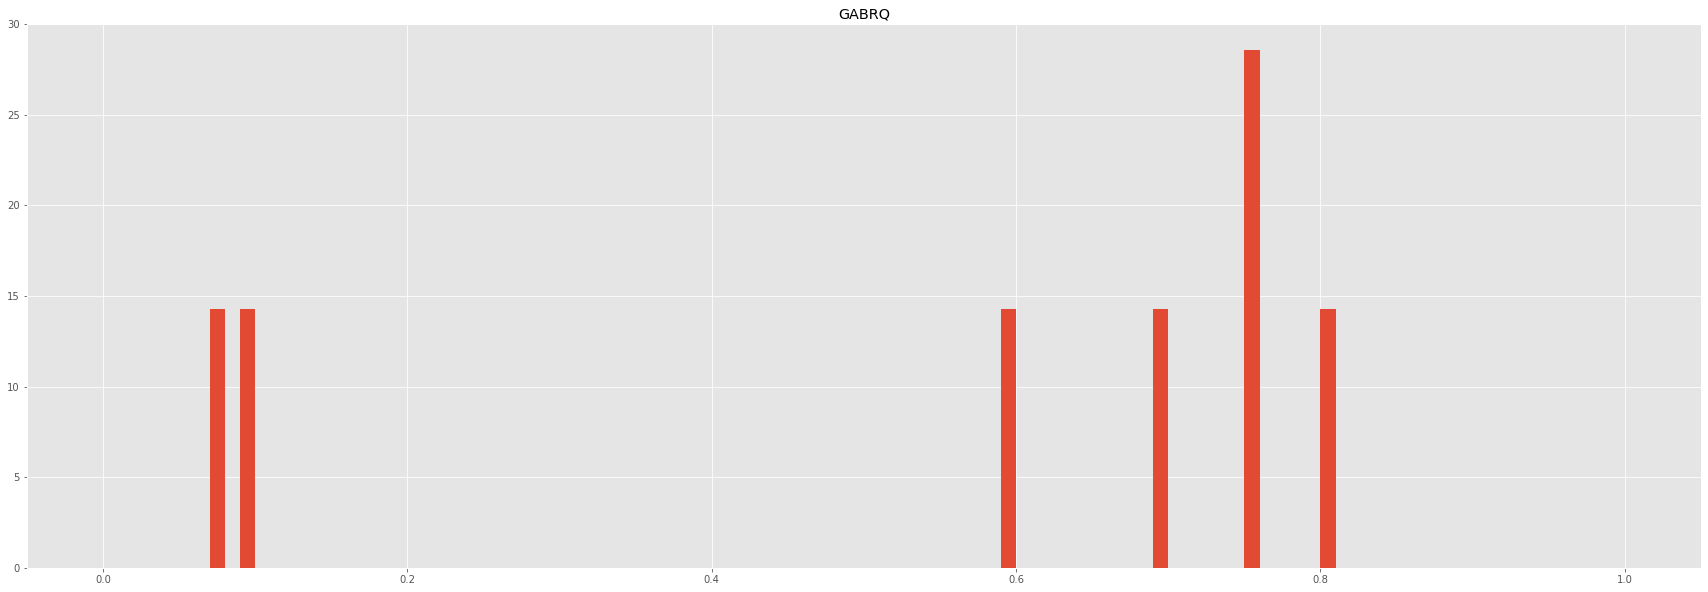

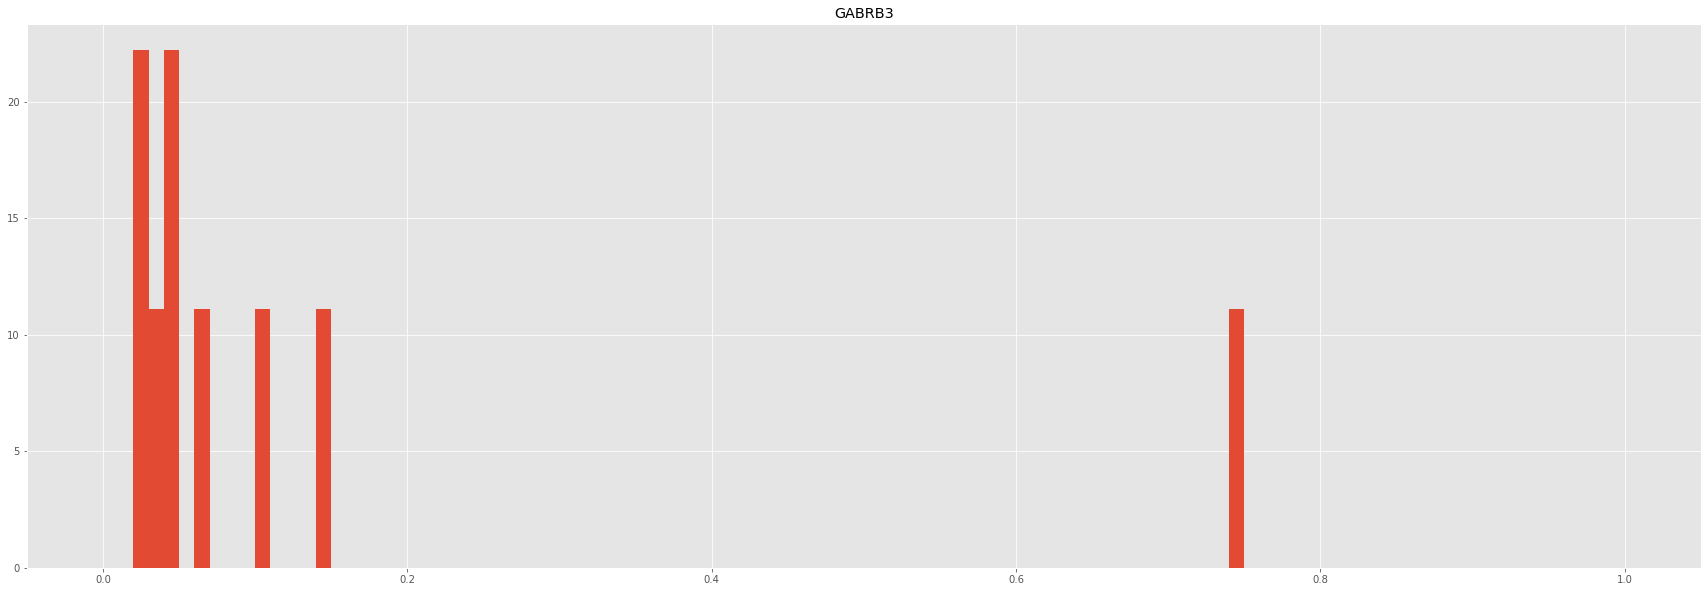

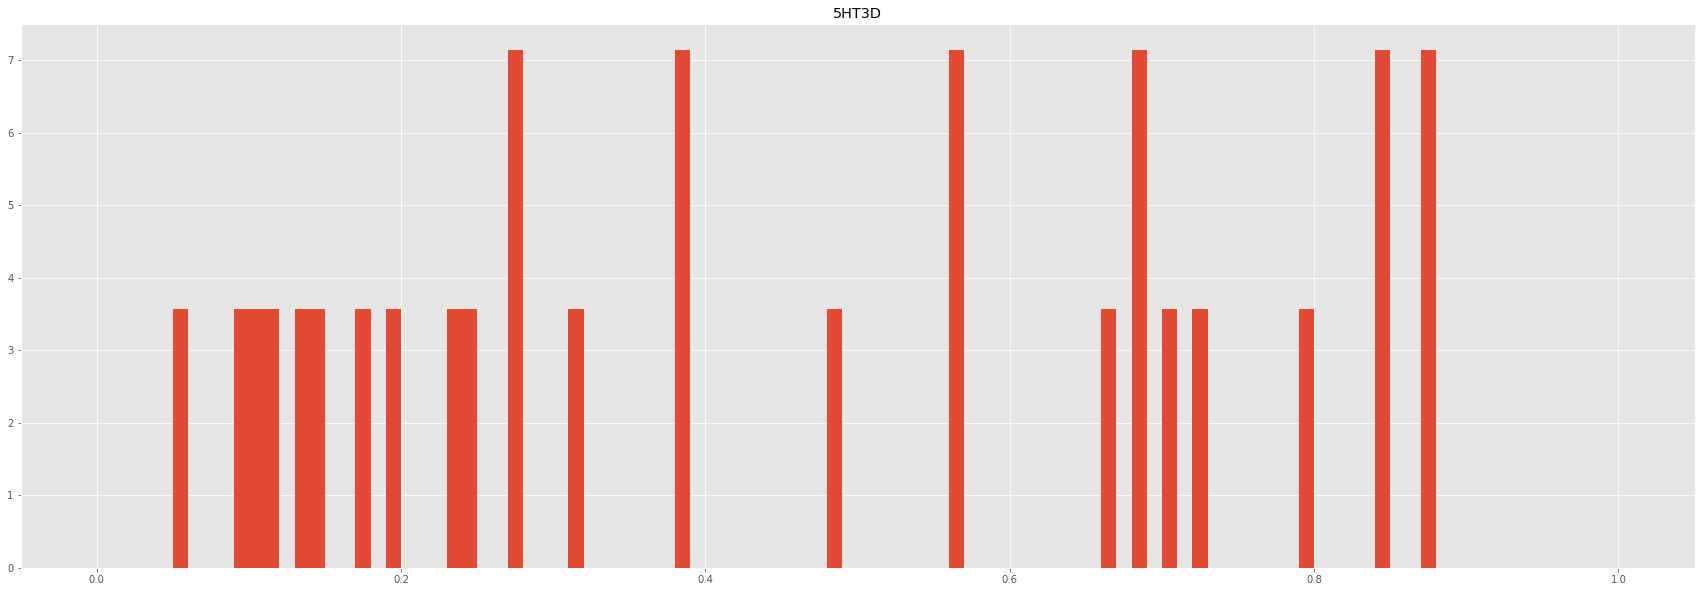

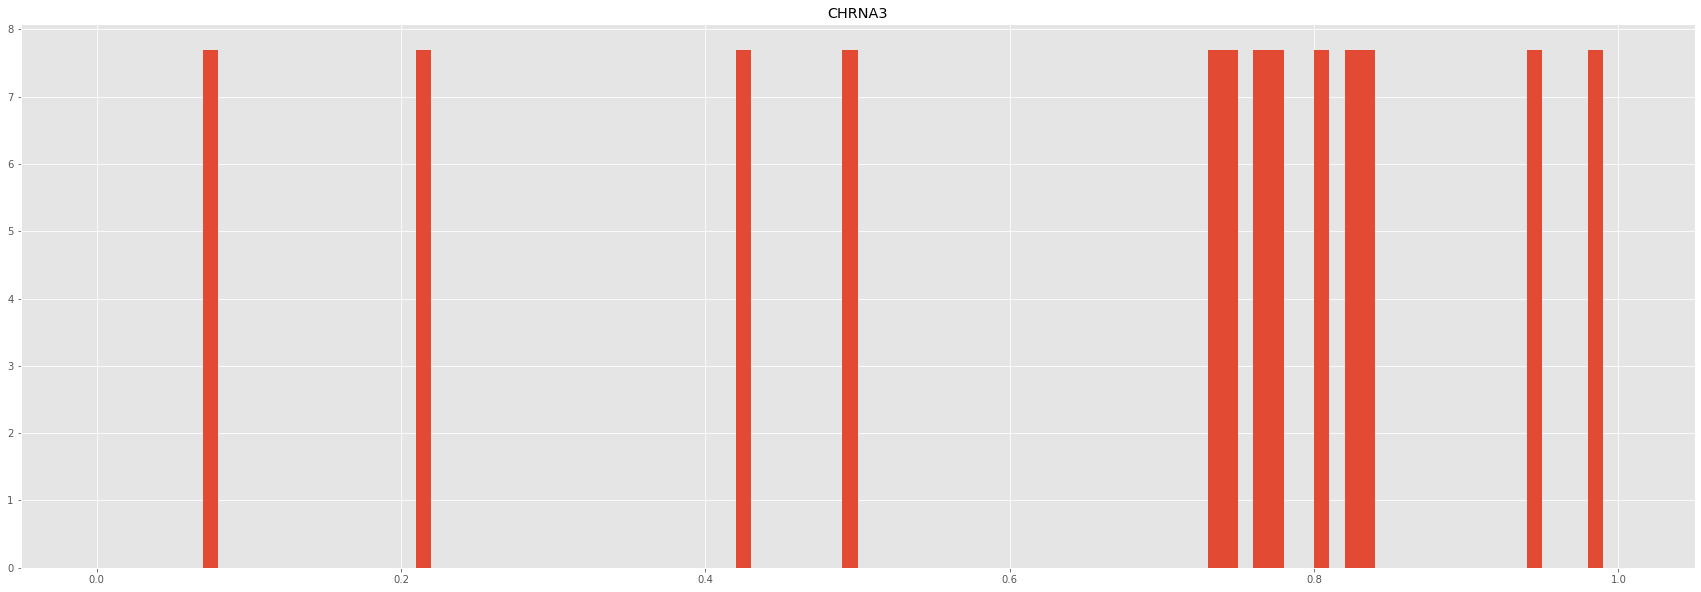

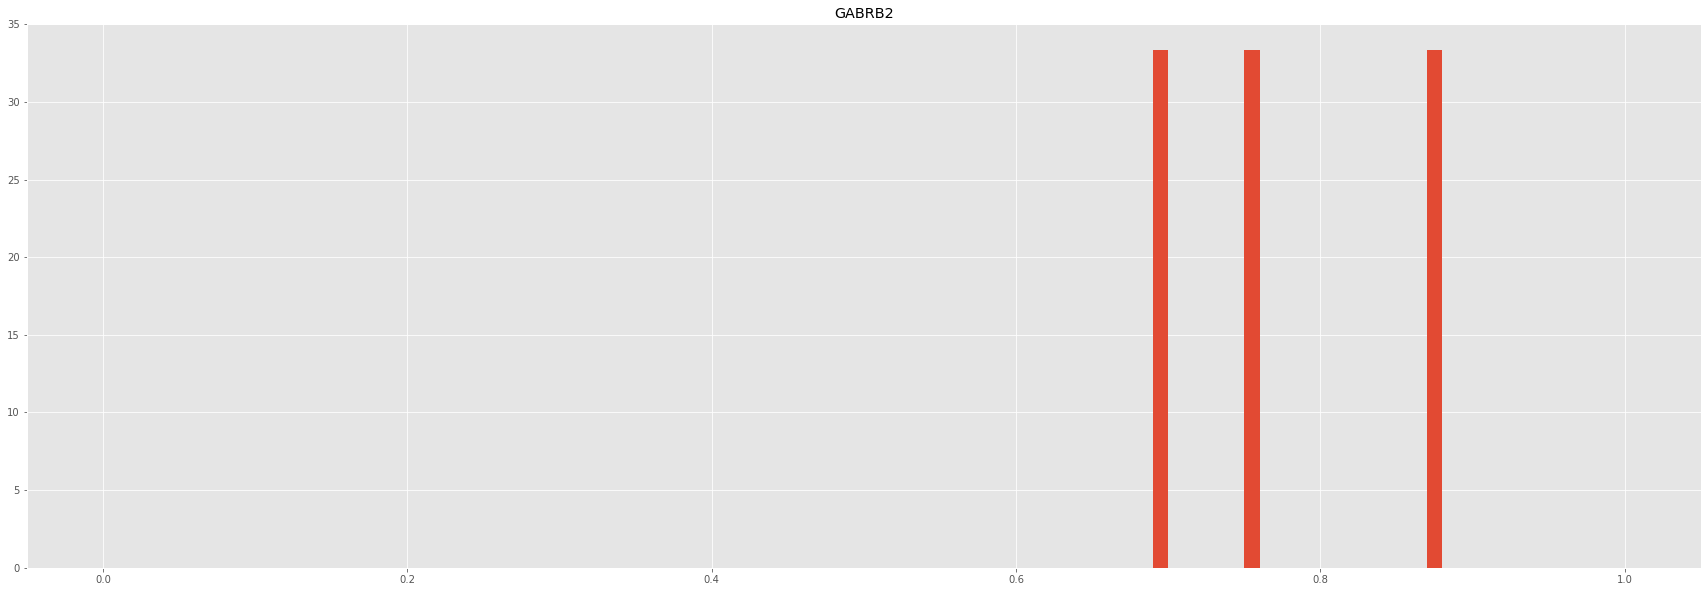

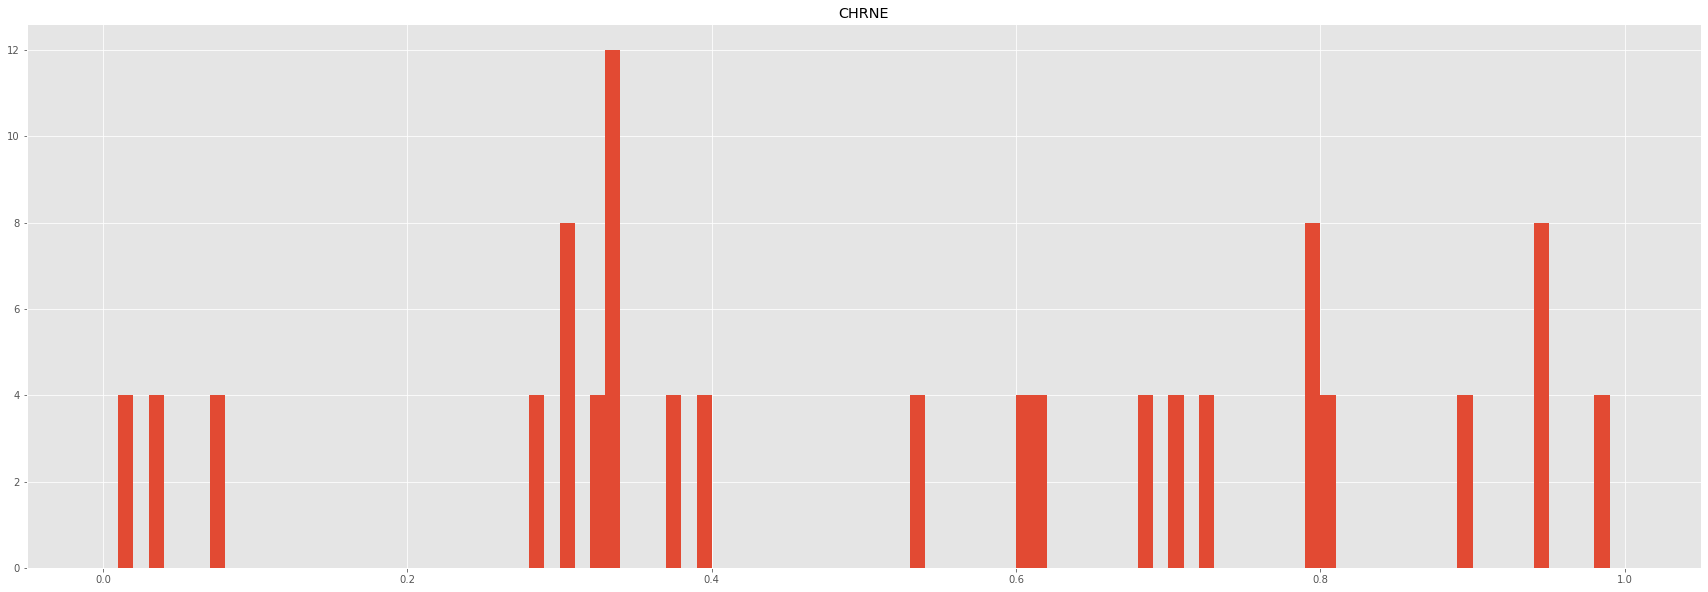

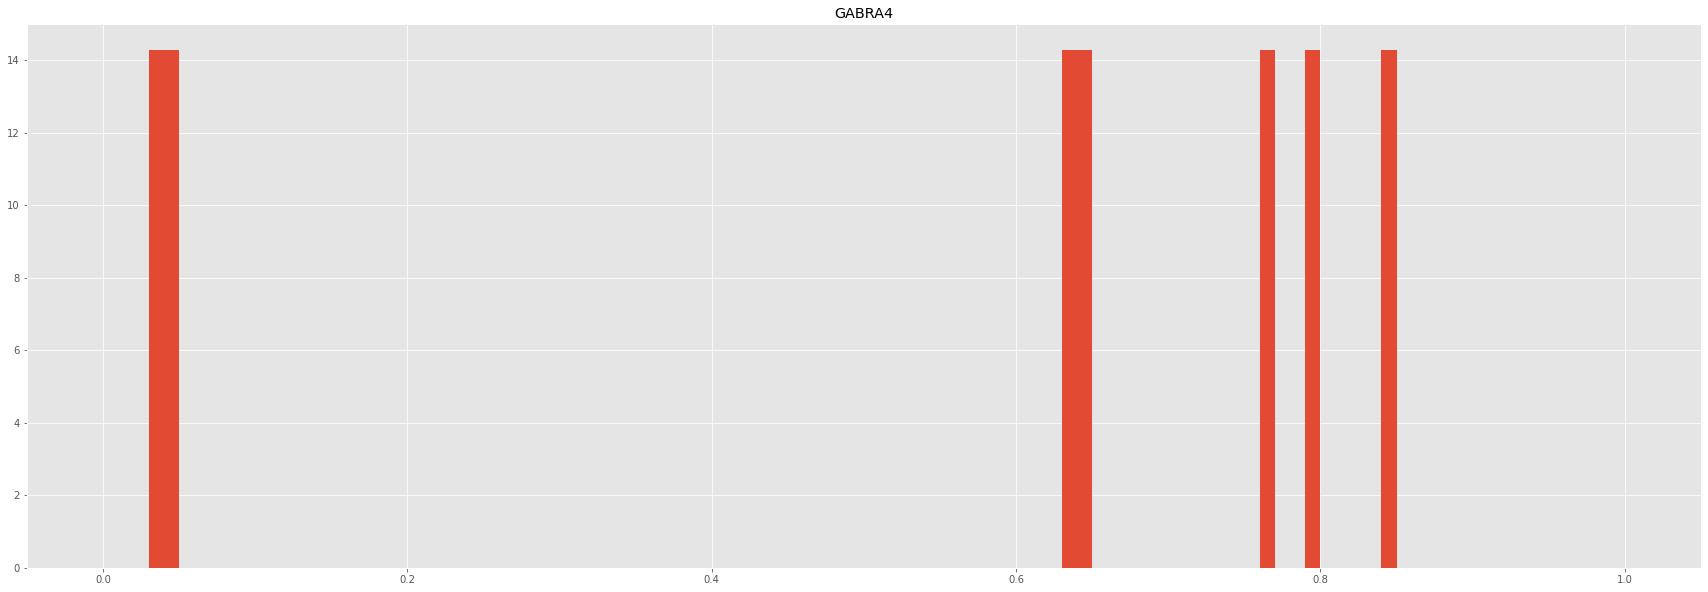

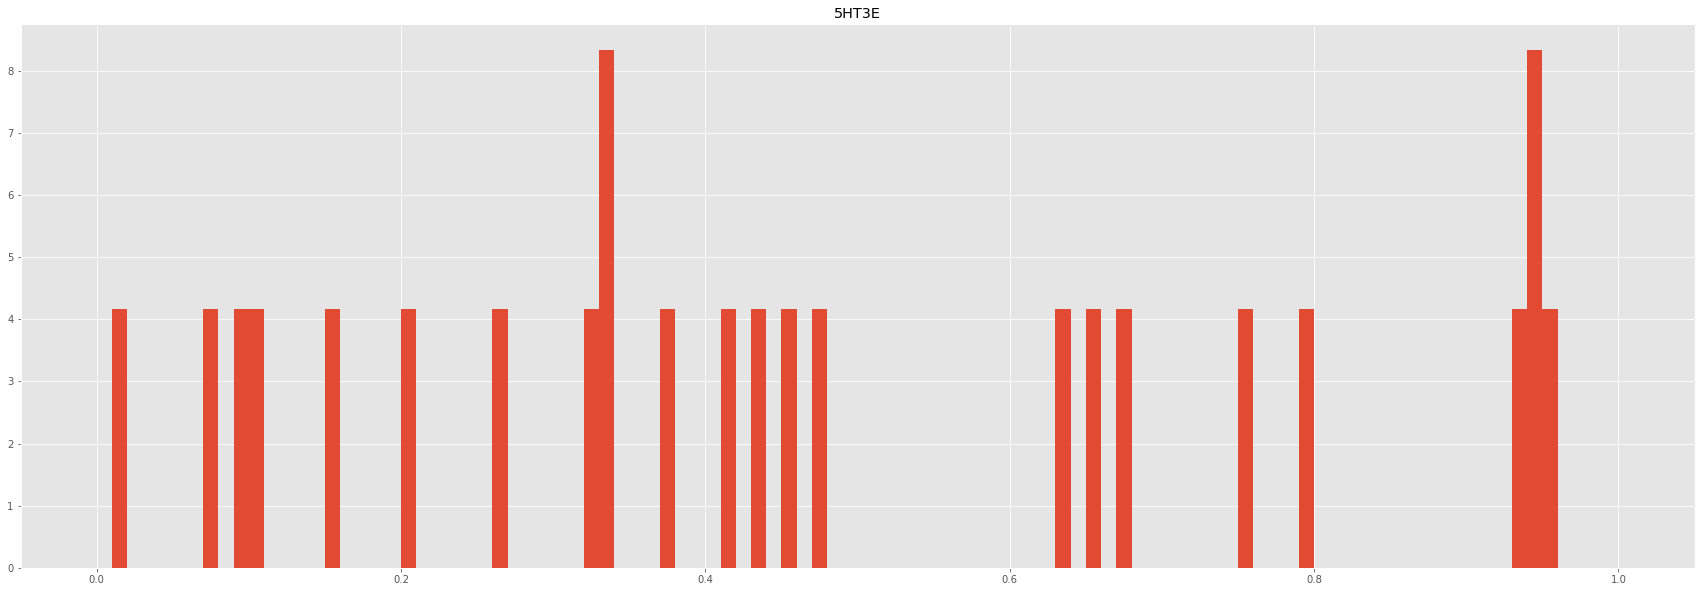

In [160]:
for gene in missense["Gene"].unique():
    pyplot.hist(missense["AA Relative"][missense["Gene"] == gene], bins=[x*0.01 for x in range(0, 101)], density=True)
    pyplot.title(gene)
    pyplot.show()

## Mapping to a common alignment

### Producing the alignment
The alignment was produced through predicted structures by AlphaFold. The sequences used in the prediction are human reference sequences from UniProt, so the predicted structures should be complete. After fetching all the structures, these were imported into MOE session, where they were aligned. First, a global `optimized for superposition` alignment was performed. After that, sequence before the start of the first beta sheet and the domain between M3 and M4 were separately aligned with `sequence only alignment` option. These parts of structures are highly mobile, but are also less important for the comparison. As such, a sequence-based alignment is good enough.

### Using the alignment

In [161]:
alignment = AlignIO.read("Alignment.aln", "clustal")

In [162]:
print(alignment)

Alignment with 118 rows and 1014 columns
--------------------------------------------...--- GABRA1
--------------------------------------------...--- GABRA2
--------------------------------------------...--- GABRA2_02
--------------------------------------------...--- GABRA2_03
--------------------------------------------...--- GABRA2_04
--------------------------MIITQTSHCYMTSLGILF...--- GABRA3
--------------------------------------------...--- GABRA4
--------------------------------------------...--- GABRA5
--------------------------------------------...--- GABRA6
--------------------------------------------...--- GABRA6_02
--------------------------------------------...--- GABRA6_03
--------------------------------------------...--- GABRA6_04
--------------------------------------------...--- GABRA6_05
--------------------------------------------...--- GABRB1
--------------------------------------------...--- GABRB2
--------------------------------------------...--- GABRB3
----------

We create a class to encapsulate the alignment and pack in it all the functions we would need for interacting with it.

In [163]:
class Alignment:
    def __init__(self, alignment_file) -> None:
        alignment = AlignIO.read(alignment_file, "clustal")
        self._sequences = {sequence.id: sequence for sequence in alignment}
    
    def convert_to_reference(self, id, acid, number):
        """
        Returns the position in the reference sequence (STARTING FROM 1) if found, else -1.
        The provided number also must start the amino acid count with 1.
        """
        if len(acid) == 3:
            acid = seq1(acid)
        sequence = self._sequences[id]
        i = 0
        for j, residue in enumerate(sequence):
            if residue != "-":
                i = i+1
                if i == number:
                    if residue == acid:
                        return j+1
                    else:
                        return -1

In [164]:
ali_class = Alignment("Alignment.aln")

In [165]:
ali_class.convert_to_reference("GABRA1", "T", 20) # Test; should be 51

71

In [166]:
missense["AA Referenced"] = missense.apply(lambda x: ali_class.convert_to_reference(x["Gene"], x["Protein Consequence"].split(".")[1][0:3], x["AA Number"]), axis=1)

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


How many of the amino acids we could not map?

In [167]:
print(-sum(missense["AA Referenced"][missense["AA Referenced"] == -1]))
print(-sum(missense["AA Referenced"][missense["AA Referenced"] == -1]) / missense.shape[0])

124
0.17893217893217894


For some SNPs the change in reference genome assembly changed the protein change assignment to an incorrect one. We use the GnomeAD v2 assignments in the cases where there is an entry present.

# Don't check by the position, but some other descriptor!!

In [168]:
alignment_subunits = ali_class._sequences.keys()
for i in range(0, missense.shape[0]-1):
    if missense.iloc[i]["AA Referenced"] == -1:
        if missense.iloc[i]["rsIDs"] is None:
            x = dataset_alternative[(dataset_alternative["Gene"] == missense.iloc[i]["Gene"]) & (dataset_alternative["Transcript Consequence"] == missense.iloc[i]["Transcript Consequence"])]
        else:
            x = dataset_alternative[(dataset_alternative["Gene"] == missense.iloc[i]["Gene"]) & (dataset_alternative["rsIDs"] == missense.iloc[i]["rsIDs"])]
        if not x.empty and x["Protein Consequence"].any():
            missense.at[i, "AA Referenced"] = ali_class.convert_to_reference(missense.iloc[i]["Gene"],
                                                    x["Protein Consequence"].str.split(".").values.tolist()[0][1][0:3],
                                                    x["Protein Consequence"].str.extract(r"[a-zA-Z]([0-9]+)[a-zA-Z]").astype("int32").values.tolist()[0][0])
        if missense.iloc[i]["AA Referenced"] == -1:
            for sub in alignment_subunits:
                if missense.iloc[i]["Gene"] in sub:
                    number = ali_class.convert_to_reference(sub,
                                                    missense.iloc[i]["Protein Consequence"].split(".")[1][0:3],
                                                    missense.iloc[i]["AA Number"])
                    if number != -1:
                        missense.at[i, "AA Referenced"] = number
                        break

C:\ProgramData\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [169]:
print(-sum(missense["AA Referenced"][missense["AA Referenced"] == -1]))
print(-sum(missense["AA Referenced"][missense["AA Referenced"] == -1]) / missense.shape[0])

1.0
0.001443001443001443


We about halved the number of unassigned amino acids. And 56 could already be manually checked if needed.

Let's see the distribution throught the genes.

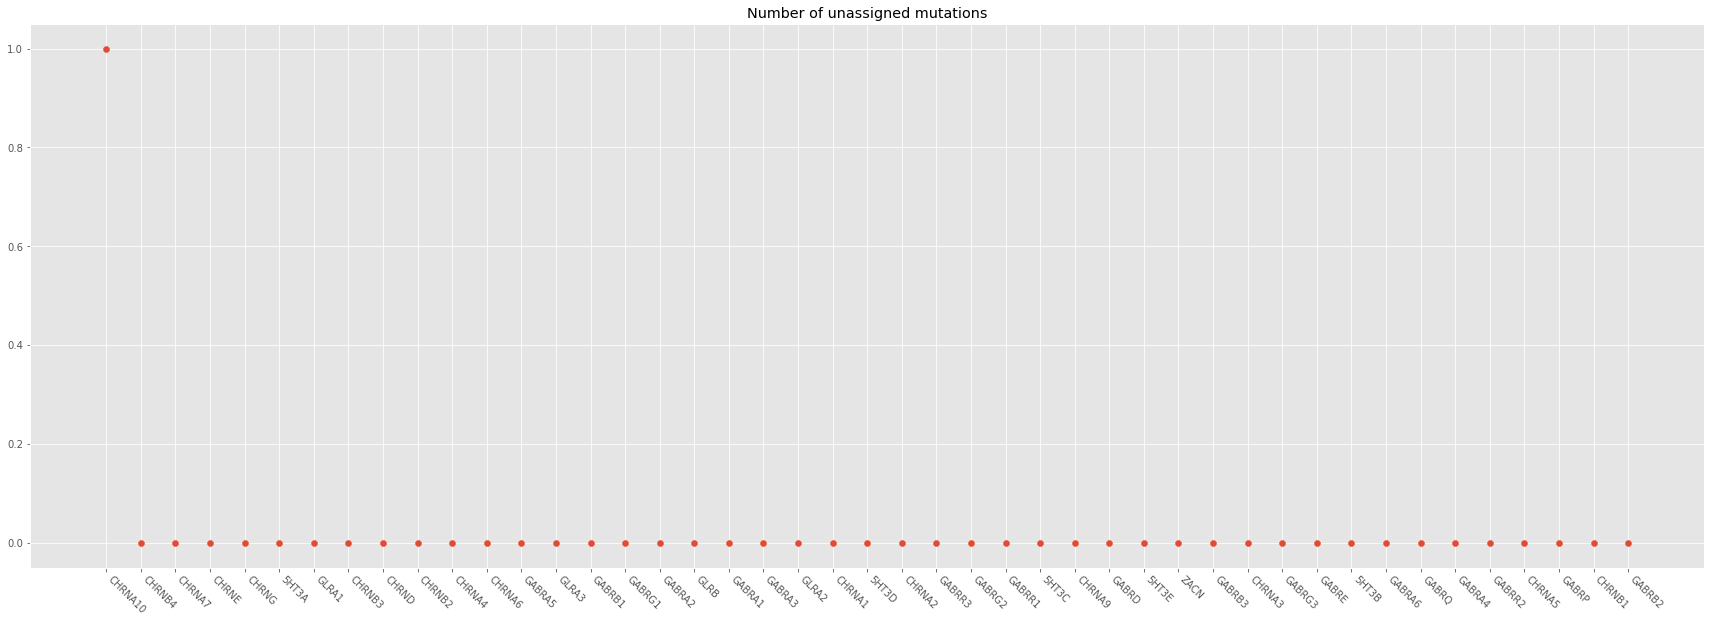

In [170]:
_values["AA Unreferenced"] = _values.apply(lambda x: -sum(missense["AA Referenced"][(missense["AA Referenced"] == -1) & (missense["Gene"] == x["Gene"])]), axis=1)
_values.sort_values(by="AA Unreferenced", ascending=False, inplace=True, ignore_index=True)

pyplot.scatter(_values["Gene"], _values["AA Unreferenced"])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.title("Number of unassigned mutations")
pyplot.show()

Let's see how this translates into the proportion of the individual gene mutations that are unasigned.

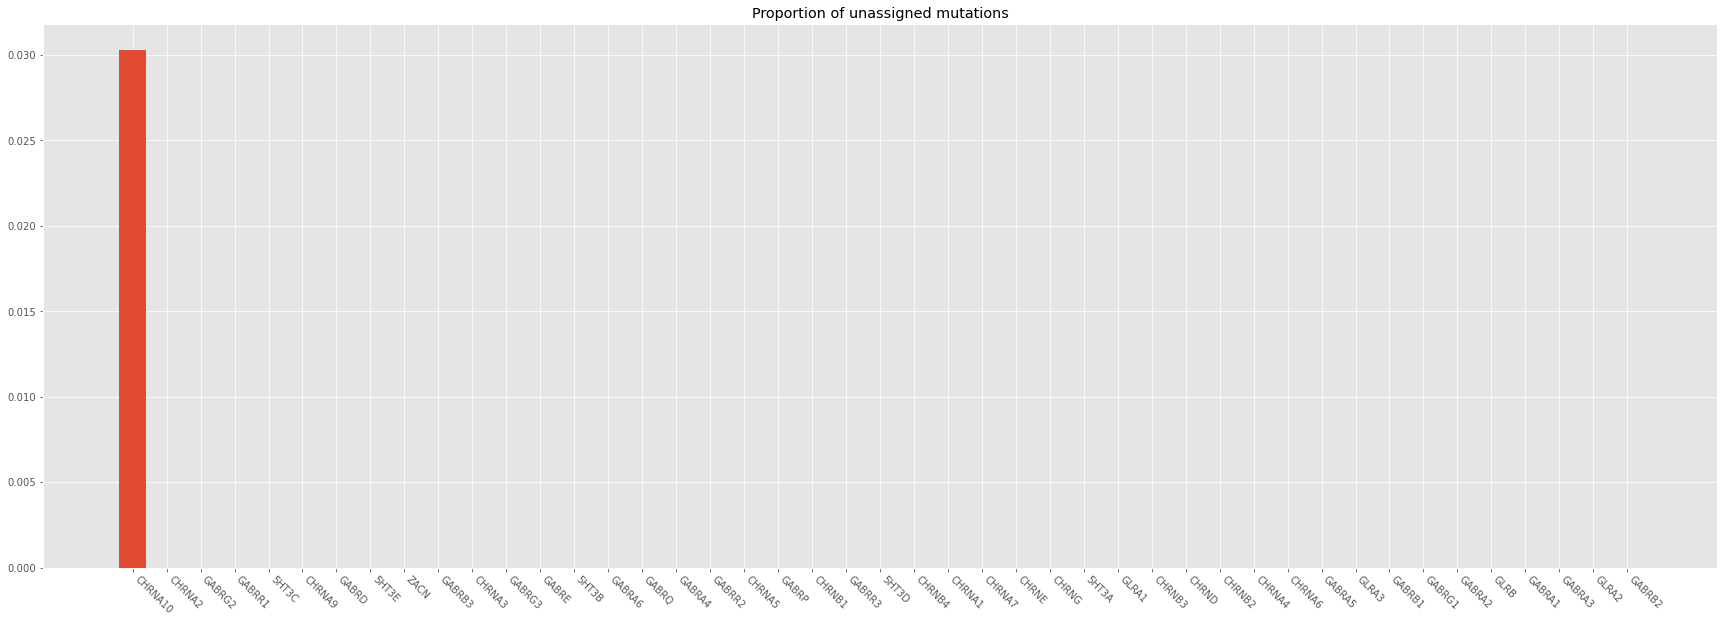

In [171]:
_values["AA Unreferenced"] = _values.apply(lambda x: -sum(missense["AA Referenced"][(missense["AA Referenced"] == -1) & (missense["Gene"] == x["Gene"])]) / sum(missense["Gene"] == x["Gene"]), axis=1)
_values.sort_values(by="AA Unreferenced", ascending=False, inplace=True, ignore_index=True)

pyplot.bar(_values["Gene"], _values["AA Unreferenced"])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.title("Proportion of unassigned mutations")
pyplot.show()

We have for now 1.6 % of SNPs where the numbering of amino acid was incorrect. We might reduce this through manual search. Is this worth it though?

For now we check where we find the variants in the reference sequence.

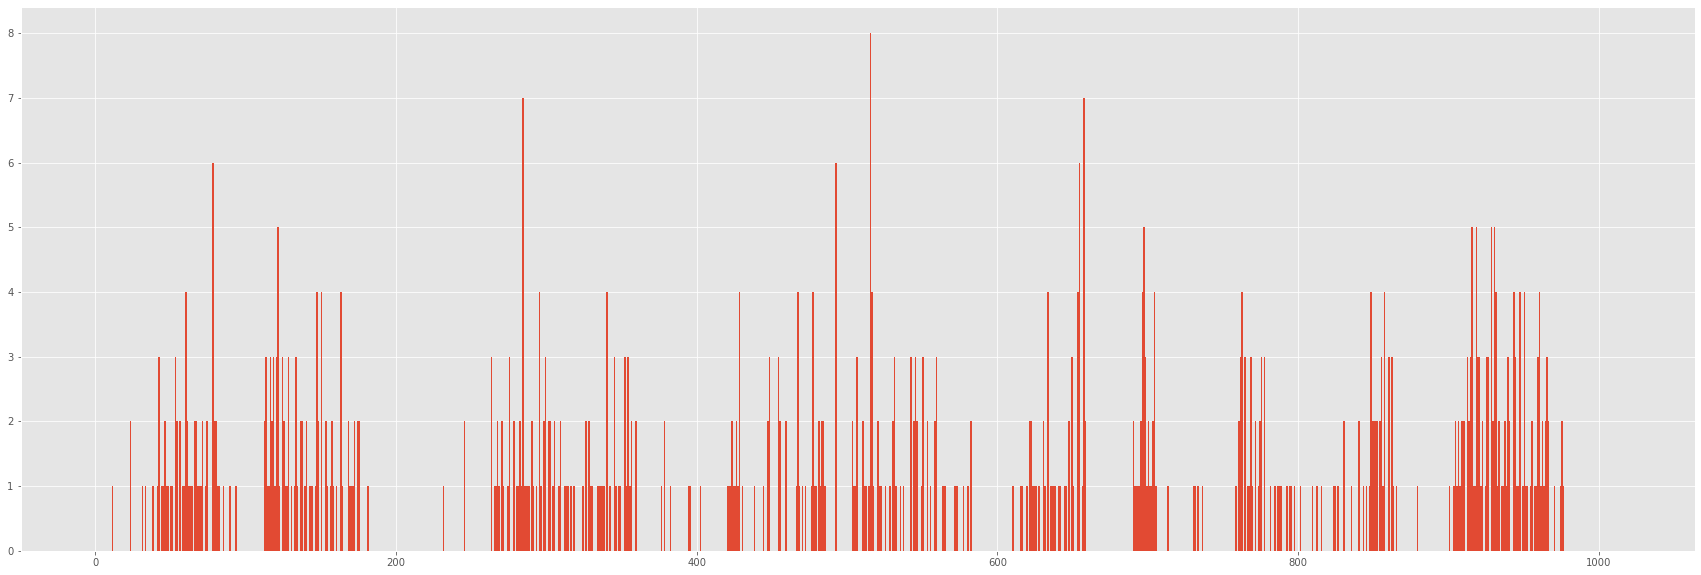

In [172]:
found_missense = missense[missense["AA Referenced"] != -1]
pyplot.hist(found_missense["AA Referenced"], bins=[x for x in range(1, len(alignment[0]))])
pyplot.show()

Just in case we will also take only one mutation per amino acid, so we can see where multiple genes get mutated.

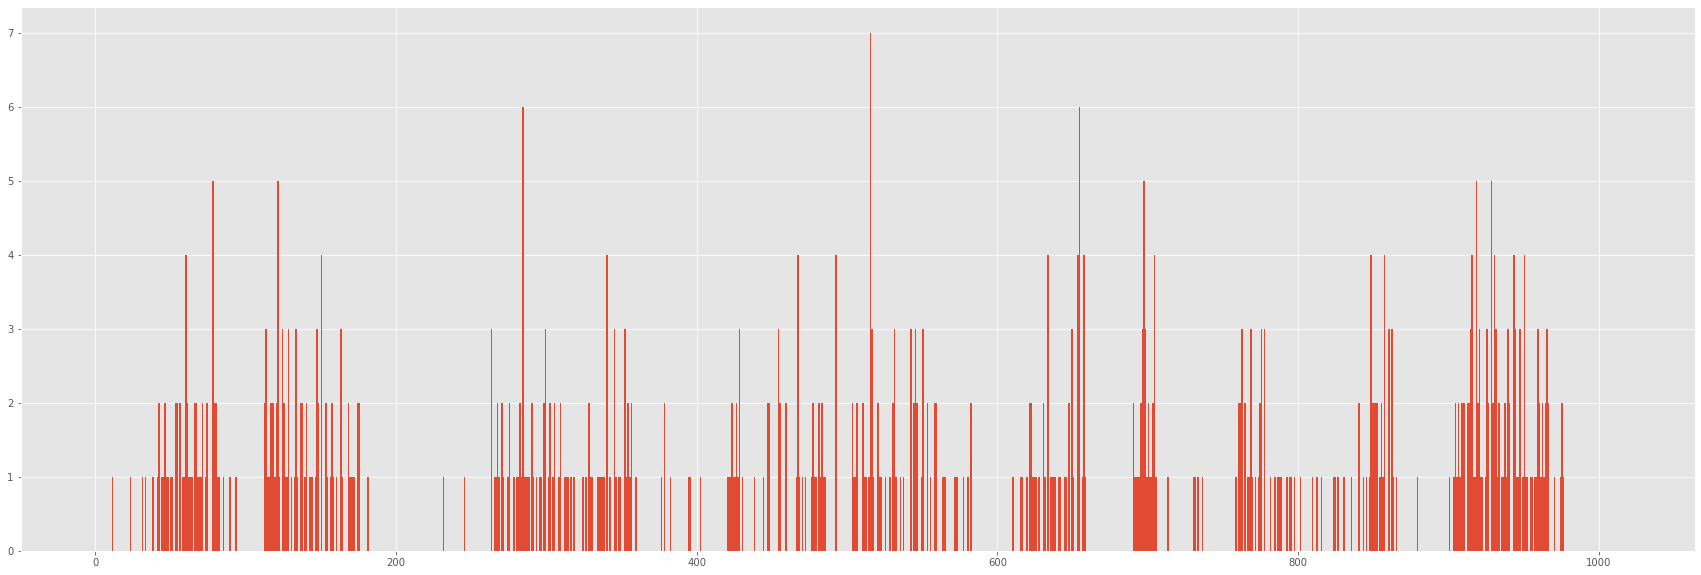

In [173]:
_unique_aas = []
for gene in found_missense["Gene"].unique():
    _unique_aas.extend(found_missense["AA Referenced"][found_missense["Gene"] == gene].unique())
pyplot.hist(_unique_aas, bins=[x for x in range(1, len(alignment[0]))])
pyplot.show()

## Mapping to structural elements
We have a list of the amino acids involved in the structural elements written in a CSV file. We load them in, amp them to the reference numbering and use them as a reference to annotate the table of mutations.

In [174]:
structural_elements = pandas.read_csv("Structural_elements.csv")
structural_elements

,Gene,AA Name,AA Number,BS
0,GABRB2,S,253,uTMD_principal_extended
1,GABRB2,I,256,uTMD_principal_extended
2,GABRB2,T,281,uTMD_principal_extended
3,GABRB2,V,282,uTMD_principal_extended
4,GABRB2,L,283,uTMD_principal_extended
5,GABRB2,T,284,uTMD_principal_extended
6,GABRB2,M,285,uTMD_principal_close
7,GABRB2,T,286,uTMD_principal_close
8,GABRB2,T,287,uTMD_principal_extended
9,GABRB2,I,288,uTMD_principal_extended


In [175]:
structural_elements["AA Referenced"] = structural_elements.apply(lambda x: ali_class.convert_to_reference(x["Gene"], x["AA Name"], x["AA Number"]) , axis=1)
structural_elements

,Gene,AA Name,AA Number,BS,AA Referenced
0,GABRB2,S,253,uTMD_principal_extended,530
1,GABRB2,I,256,uTMD_principal_extended,533
2,GABRB2,T,281,uTMD_principal_extended,559
3,GABRB2,V,282,uTMD_principal_extended,560
4,GABRB2,L,283,uTMD_principal_extended,561
5,GABRB2,T,284,uTMD_principal_extended,562
6,GABRB2,M,285,uTMD_principal_close,563
7,GABRB2,T,286,uTMD_principal_close,564
8,GABRB2,T,287,uTMD_principal_extended,565
9,GABRB2,I,288,uTMD_principal_extended,566


A quick look at the mutations in the core of uTMD site.

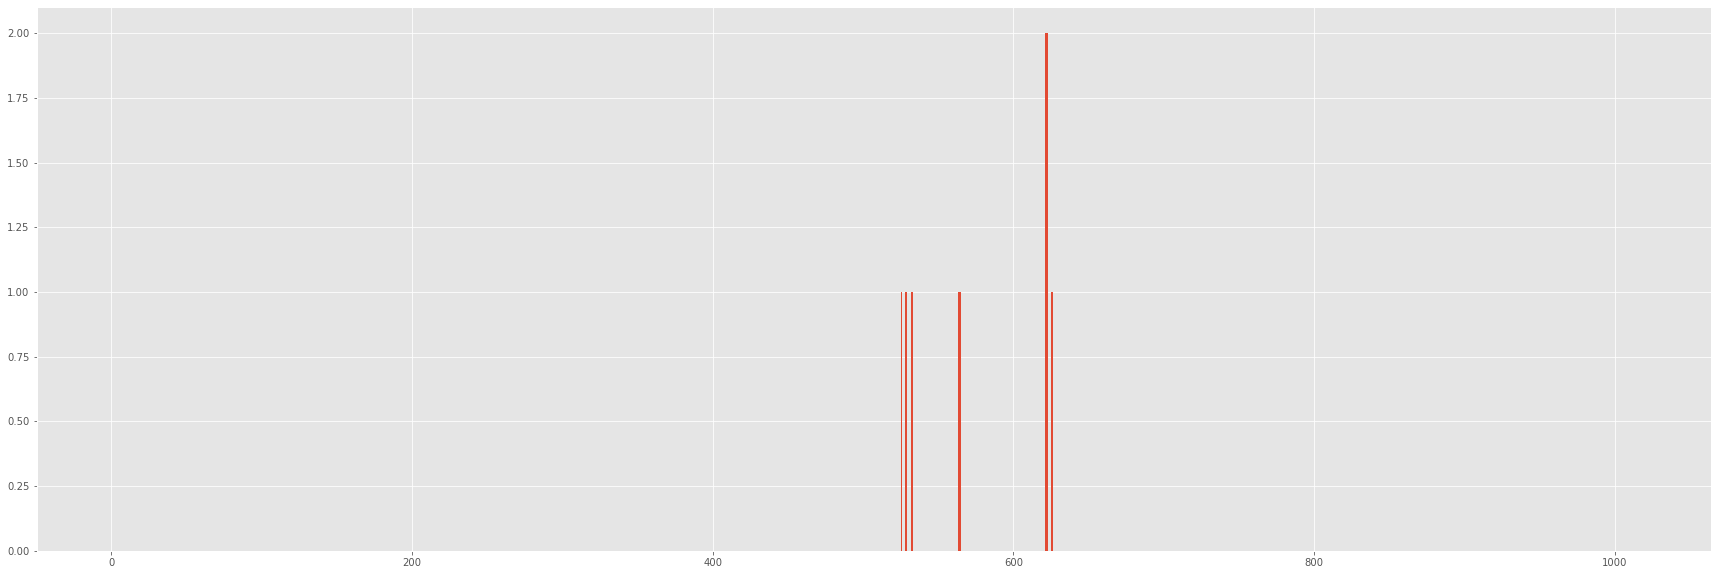

In [176]:
close_only = missense[missense["AA Referenced"].isin(structural_elements["AA Referenced"][structural_elements["BS"].isin(["uTMD_principal_close", "uTMD_complementary_close"])])]

pyplot.hist(close_only["AA Referenced"], bins=[x for x in range(1, len(alignment[0]))])
pyplot.show()

In [177]:
missense_annotated = pandas.merge(missense, structural_elements[["AA Referenced", "BS"]], how="left", on="AA Referenced")
missense_annotated

,level_0,index,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,...,Hemizygote Count African/African-American,Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Gene,AA Number,AA Relative,AA Referenced,BS
0,101,101,8,27463009.0,rs56344740,G,T,gnomAD Genomes,NaN,PASS,...,0.0,387.0,68036.0,1.0,0.0,CHRNA2,478,0.903592,919.0,NaN
1,150,150,8,27463209.0,rs141721605,C,T,gnomAD Genomes,NaN,PASS,...,0.0,34.0,68048.0,0.0,0.0,CHRNA2,412,0.778828,771.0,NaN
2,183,183,8,27463343.0,rs149464248,C,T,gnomAD Genomes,NaN,PASS,...,0.0,7.0,68004.0,0.0,0.0,CHRNA2,367,0.693762,657.0,NaN
3,270,270,8,27463698.0,rs77710085,C,T,gnomAD Genomes,NaN,PASS,...,0.0,2.0,54494.0,0.0,0.0,CHRNA2,249,0.470699,492.0,NaN
4,272,272,8,27463712.0,rs146751925,T,C,gnomAD Genomes,NaN,PASS,...,0.0,0.0,65718.0,0.0,0.0,CHRNA2,244,0.461248,484.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,28627,28635,3,184106293.0,rs141615038,C,T,gnomAD Genomes,NaN,PASS,...,0.0,2.0,68020.0,0.0,0.0,5HT3E,364,0.798246,704.0,NaN
691,28687,28695,3,184106595.0,rs149134892,T,G,gnomAD Genomes,NaN,PASS,...,0.0,9.0,68014.0,0.0,0.0,5HT3E,425,0.932018,939.0,NaN
692,28690,28698,3,184106610.0,rs13324468,G,A,gnomAD Genomes,NaN,PASS,...,0.0,22.0,68018.0,0.0,0.0,5HT3E,430,0.942982,944.0,NaN
693,28697,28705,3,184106619.0,rs146232407,G,A,gnomAD Genomes,NaN,PASS,...,0.0,6.0,68020.0,0.0,0.0,5HT3E,433,0.949561,947.0,NaN


In [178]:
annotated = missense_annotated[~missense_annotated["BS"].isna()]
annotated

,level_0,index,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,...,Hemizygote Count African/African-American,Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Gene,AA Number,AA Relative,AA Referenced,BS
18,764,764,3,97992937.0,rs369082236,A,G,gnomAD Genomes,NaN,PASS,...,0.0,1.0,68030.0,0.0,0.0,GABRR3,340,0.728051,627.0,uTMD_principal_extended
71,3622,3622,1,2029194.0,rs148908731,G,A,gnomAD Genomes,NaN,PASS,...,0.0,4.0,68042.0,0.0,0.0,GABRD,259,0.573009,531.0,uTMD_complementary_extended
74,3668,3668,1,2029365.0,rs891534627,C,G,gnomAD Genomes,NaN,PASS,...,0.0,8.0,68012.0,0.0,0.0,GABRD,252,0.557522,525.0,uTMD_complementary_close
75,3733,3733,1,2029645.0,rs139676179,C,T,gnomAD Genomes,NaN,PASS,...,0.0,1.0,68034.0,0.0,0.0,GABRD,127,0.280973,621.0,uTMD_principal_close
76,3737,3737,1,2029672.0,rs146381127,C,T,gnomAD Genomes,NaN,PASS,...,0.0,4.0,68018.0,0.0,0.0,GABRD,334,0.738938,630.0,uTMD_principal_extended
113,5037,5037,5,170809612.0,rs79997355,C,T,gnomAD Genomes,NaN,PASS,...,0.0,54.0,68032.0,0.0,0.0,GABRP,293,0.665909,571.0,uTMD_principal_extended
146,6087,6091,15,78629575.0,rs368785360,C,T,gnomAD Genomes,NaN,PASS,...,0.0,0.0,68012.0,0.0,0.0,CHRNB4,244,0.489960,531.0,uTMD_complementary_extended
162,6587,6591,X,151955472.0,rs147565446,C,T,gnomAD Genomes,NaN,PASS,...,0.0,17.0,53267.0,0.0,5.0,GABRE,345,0.681818,622.0,uTMD_principal_close
163,6640,6644,X,151955812.0,rs140182680,C,G,gnomAD Genomes,NaN,PASS,...,0.0,77.0,53260.0,0.0,18.0,GABRE,278,0.549407,520.0,uTMD_complementary_extended
184,7403,7407,2,232531393.0,rs41265127,C,G,gnomAD Genomes,NaN,PASS,...,0.0,212.0,67978.0,0.0,0.0,CHRND,288,0.557060,563.0,uTMD_principal_close


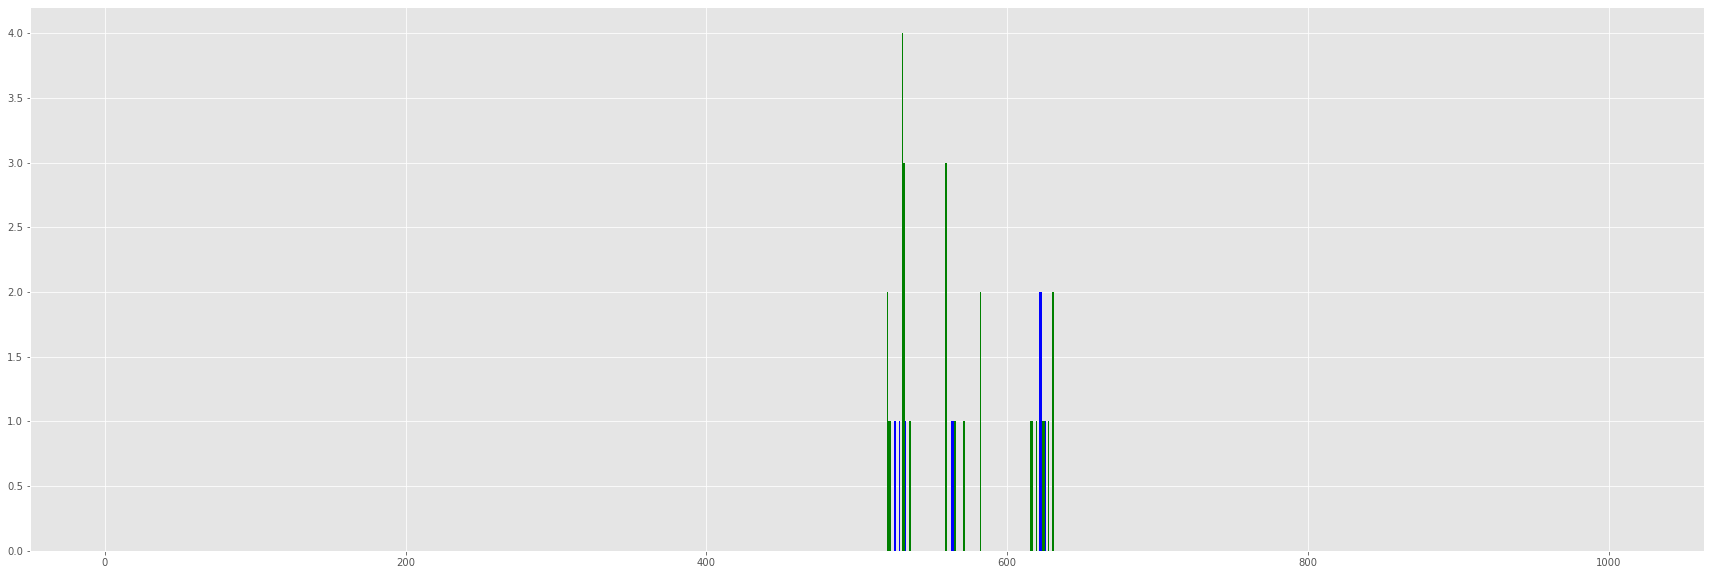

In [179]:
pyplot.hist(annotated["AA Referenced"][annotated["BS"].str.endswith("close")], bins=[x for x in range(1, len(alignment[0]))], color = "blue") 
pyplot.hist(annotated["AA Referenced"][annotated["BS"].str.endswith("extended")], bins=[x for x in range(1, len(alignment[0]))], color = "green")
pyplot.show()